In [1]:
#lets import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [265]:
#loading the NSE NIFTY 1min interval csv dataset using pandas
df_nse = pd.read_csv('NSE_NIFTY, 1Min Data 26oct2020-18jan2021_DatasetForAssignment.csv')
df_nse

,time,open,high,low,close
0,2020-10-26T03:45:00Z,11942.85,11942.85,11901.65,11918.85
1,2020-10-26T03:46:00Z,11916.80,11922.95,11905.55,11907.10
2,2020-10-26T03:47:00Z,11906.50,11909.90,11904.10,11908.50
3,2020-10-26T03:48:00Z,11907.40,11908.50,11896.05,11896.55
4,2020-10-26T03:49:00Z,11897.40,11897.40,11889.30,11890.80
...,...,...,...,...,...
21808,2021-01-18T09:55:00Z,14241.65,14244.30,14237.50,14239.95
21809,2021-01-18T09:56:00Z,14239.30,14239.30,14233.80,14236.50
21810,2021-01-18T09:57:00Z,14237.20,14239.20,14233.30,14237.05
21811,2021-01-18T09:58:00Z,14236.35,14237.10,14224.95,14230.85


In [266]:
df_nse['time'] = pd.to_datetime(df_nse['time'])

In [267]:
df_nse.columns

Index(['time', 'open', 'high', 'low', 'close'], dtype='object')

In [268]:
df_nse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   time    21813 non-null  datetime64[ns, UTC]
 1   open    21813 non-null  float64            
 2   high    21813 non-null  float64            
 3   low     21813 non-null  float64            
 4   close   21813 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 852.2 KB


In [269]:
#Now lets import the csv file generated from our strategy "strategy1.csv" which was generated from c++ program.
df_trade = pd.read_csv('strategy1.csv')
df_trade

,time,open,high,low,close,Signal,Status,Target,StopLoss,Buy_Price,Trade_date,Trade status,Flag,Trade_type,Sell_Price
0,2020-10-26T03:45:00Z,11942.85,11942.85,11901.65,11918.85,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
1,2020-10-26T03:46:00Z,11916.80,11922.95,11905.55,11907.10,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
2,2020-10-26T03:47:00Z,11906.50,11909.90,11904.10,11908.50,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
3,2020-10-26T03:48:00Z,11907.40,11908.50,11896.05,11896.55,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
4,2020-10-26T03:49:00Z,11897.40,11897.40,11889.30,11890.80,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21808,2021-01-18T09:55:00Z,14241.65,14244.30,14237.50,14239.95,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
21809,2021-01-18T09:56:00Z,14239.30,14239.30,14233.80,14236.50,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
21810,2021-01-18T09:57:00Z,14237.20,14239.20,14233.30,14237.05,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0
21811,2021-01-18T09:58:00Z,14236.35,14237.10,14224.95,14230.85,-,Inactive,0.0,0.0,0.0,-,-,0,-,0.0


In [271]:
df_trade.iloc[7563:7568,0:15]

,time,open,high,low,close,Signal,Status,Target,StopLoss,Buy_Price,Trade_date,Trade status,Flag,Trade_type,Sell_Price
7563,2020-11-24T03:45:00Z,13005.60,13005.60,12978.00,12994.70,Buy,Active,13137.84961,12958.91309,12994.70020,2020-11-25T08:28:00Z,Inactive,1,SL,12944.05
7564,2020-11-24T03:46:00Z,12995.75,12999.80,12991.65,12999.20,Buy,Active,13142.34961,12963.41309,12999.20020,2020-11-25T08:24:00Z,Inactive,1,SL,12959.50
7565,2020-11-24T03:47:00Z,12999.15,13008.40,12998.05,13004.60,Buy,Active,13147.74902,12968.81250,13004.59961,2020-11-25T05:47:00Z,Inactive,1,SL,12964.20
7566,2020-11-24T03:48:00Z,13005.20,13011.35,13001.00,13002.45,Buy,Active,13145.59961,12966.66309,13002.45020,2020-11-25T05:47:00Z,Inactive,1,SL,12964.20
7567,2020-11-24T03:49:00Z,13003.25,13008.90,13001.75,13007.35,Buy,Active,13150.49902,12971.56250,13007.34961,2020-11-25T05:46:00Z,Inactive,1,SL,12970.95


In [272]:
df_trade['time'] = pd.to_datetime(df_trade['time'])

In [273]:
for i in range(len(df_trade)):
    if(df_trade[' Signal'].iloc[i] == ' Buy'):
        df_trade[' Trade_date'].iloc[i] = pd.to_datetime(df_trade[' Trade_date'].iloc[i])

C:\Users\Mukane\anaconda3\envs\my_env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [274]:
df_trade.columns

Index(['time', ' open', ' high', ' low', ' close', ' Signal', ' Status',
       ' Target', ' StopLoss', ' Buy_Price', ' Trade_date', ' Trade status',
       ' Flag', ' Trade_type', ' Sell_Price'],
      dtype='object')

Let us understand some features of the data set

Signal- indicating 'Buy' signal if the trade is taken place

Status- showing trade status if there was 'Buy' then active

Target-indicating the target price for stock which was buy

StopLoss - indicating the stop loss price for stock which was buy for compensation of loss if trend goes down

Buy_Price - indicate buy price of share

Trade_date -date when the target/stoploss is met and stock was sold

Trade status -	after selling the stock trade status is changed to inactive

Flag -	count '1' as trade took place

Trade_type - indicating trade type if target is met then 'TP' indicating profit else if stoploss is met 'SL' indicating loss

Sell_Price - price at which stock was sold

In [275]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time           21813 non-null  datetime64[ns, UTC]
 1    open          21813 non-null  float64            
 2    high          21813 non-null  float64            
 3    low           21813 non-null  float64            
 4    close         21813 non-null  float64            
 5    Signal        21813 non-null  object             
 6    Status        21813 non-null  object             
 7    Target        21813 non-null  float64            
 8    StopLoss      21813 non-null  float64            
 9    Buy_Price     21813 non-null  float64            
 10   Trade_date    21813 non-null  object             
 11   Trade status  21813 non-null  object             
 12   Flag          21813 non-null  int64              
 13   Trade_type    21813 non-null  object         

## Data Analysis and Visualization

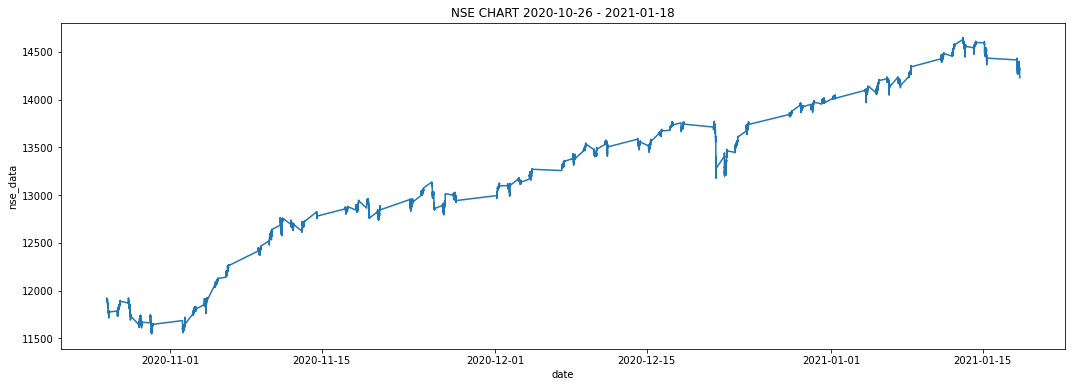

In [276]:
#first lets visualize the 1 min data and see some trend
plt.figure(figsize=(18,6))
plt.plot(df_nse['time'], df_nse['close'])
#plt.scatter(df_nse['time'], df_trade[' Buy_Price'], label = 'Buy', marker ='^', color = 'green')
plt.xlabel("date")
plt.ylabel("nse_data")
plt.title("NSE CHART 2020-10-26 - 2021-01-18")
plt.show()

From plot we can see that at time around november month the graph is lowest and starts to increase and between december and january same kind of trend is seen. So most like this two periods are suitable for strategy1 to take place and met the target profit. Lets analyze the data generated from c++ code.

now lets plot the data from the generated csv 

Identify instances when strategy 1 happened, you need to get following information:

1.What time in a day strategy 1 occurred

2.How many times it happened in the course of the given time period (26-October-2020 to 18-January-2021)

3.If the strategy 1 occurred how much profit trader made assuming number of stocks bought were 10 when the trade was "Active".

In [143]:
count = 0
buy_time = []
sell_time = []
buy = []
sell = []

for i in range(len(df_trade)):
    if(df_trade[' Signal'].iloc[i] == ' Buy'):
        print("Buy signal on {} at {} and sell signal on {} at {}".format(df_trade['time'].iloc[i],df_trade[' Buy_Price'].iloc[i],df_trade[' Trade_date'].iloc[i],df_trade[' Sell_Price'].iloc[i]))
        buy_time.append(df_trade['time'].iloc[i])
        sell_time.append(df_trade[' Trade_date'].iloc[i])
        buy.append(df_trade[' Buy_Price'].iloc[i])
        sell.append(df_trade[' Sell_Price'].iloc[i])
    count = count + 1
        

Buy signal on 2020-10-28 03:55:00+00:00 at 11908.049805 and sell signal on 2020-10-28 04:34:00+00:00 at 11863.75
Buy signal on 2020-10-28 03:56:00+00:00 at 11915.200195 and sell signal on 2020-10-28 04:33:00+00:00 at 11869.1
Buy signal on 2020-10-28 03:57:00+00:00 at 11916.450195 and sell signal on 2020-10-28 04:32:00+00:00 at 11872.1
Buy signal on 2020-10-28 03:58:00+00:00 at 11921.349609 and sell signal on 2020-10-28 04:30:00+00:00 at 11876.1
Buy signal on 2020-10-28 03:59:00+00:00 at 11917.799805 and sell signal on 2020-10-28 04:32:00+00:00 at 11872.1
Buy signal on 2020-10-28 04:00:00+00:00 at 11914.549805 and sell signal on 2020-10-28 04:33:00+00:00 at 11869.1
Buy signal on 2020-10-28 04:01:00+00:00 at 11912.349609 and sell signal on 2020-10-28 04:34:00+00:00 at 11863.75
Buy signal on 2020-10-28 04:02:00+00:00 at 11923.799805 and sell signal on 2020-10-28 04:30:00+00:00 at 11876.1
Buy signal on 2020-10-28 04:03:00+00:00 at 11920.400391 and sell signal on 2020-10-28 04:30:00+00:00 a

Buy signal on 2020-11-03 05:08:00+00:00 at 11794.150391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:09:00+00:00 at 11794.150391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:10:00+00:00 at 11792.700195 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:11:00+00:00 at 11789.75 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:12:00+00:00 at 11793.900391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:13:00+00:00 at 11800.599609 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-03 05:14:00+00:00 at 11808.0 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 05:15:00+00:00 at 11811.049805 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 05:16:00+00:00 at 11802.400391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4

Buy signal on 2020-11-03 07:21:00+00:00 at 11823.200195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 07:22:00+00:00 at 11824.200195 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:23:00+00:00 at 11824.299805 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:24:00+00:00 at 11832.549805 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:25:00+00:00 at 11826.599609 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:26:00+00:00 at 11825.849609 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:27:00+00:00 at 11823.450195 and sell signal on 2020-11-03 09:00:00+00:00 at 11781.25
Buy signal on 2020-11-03 07:28:00+00:00 at 11822.450195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 07:29:00+00:00 at 11822.599609 and sell signal on 2020-11-04 07:48:00+0

Buy signal on 2020-11-03 09:11:00+00:00 at 11813.200195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:12:00+00:00 at 11811.099609 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:13:00+00:00 at 11811.200195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:14:00+00:00 at 11810.200195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:15:00+00:00 at 11815.25 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:16:00+00:00 at 11818.650391 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:17:00+00:00 at 11817.599609 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:18:00+00:00 at 11816.950195 and sell signal on 2020-11-04 07:48:00+00:00 at 11764.95
Buy signal on 2020-11-03 09:19:00+00:00 at 11816.900391 and sell signal on 2020-11-04 07:48:00+00:00

Buy signal on 2020-11-04 04:23:00+00:00 at 11891.950195 and sell signal on 2020-11-04 04:44:00+00:00 at 11861.75
Buy signal on 2020-11-04 04:24:00+00:00 at 11898.549805 and sell signal on 2020-11-04 04:36:00+00:00 at 11871.4
Buy signal on 2020-11-04 04:25:00+00:00 at 11903.950195 and sell signal on 2020-11-04 04:35:00+00:00 at 11874.35
Buy signal on 2020-11-04 04:26:00+00:00 at 11907.0 and sell signal on 2020-11-04 04:35:00+00:00 at 11874.35
Buy signal on 2020-11-04 04:27:00+00:00 at 11901.799805 and sell signal on 2020-11-04 04:35:00+00:00 at 11874.35
Buy signal on 2020-11-04 04:28:00+00:00 at 11895.349609 and sell signal on 2020-11-04 04:38:00+00:00 at 11865.45
Buy signal on 2020-11-04 04:29:00+00:00 at 11899.200195 and sell signal on 2020-11-04 04:36:00+00:00 at 11871.4
Buy signal on 2020-11-04 04:30:00+00:00 at 11891.150391 and sell signal on 2020-11-04 04:44:00+00:00 at 11861.75
Buy signal on 2020-11-04 04:31:00+00:00 at 11894.700195 and sell signal on 2020-11-04 04:38:00+00:00 at

Buy signal on 2020-11-04 05:49:00+00:00 at 11848.599609 and sell signal on 2020-11-04 07:41:00+00:00 at 11806.6
Buy signal on 2020-11-04 05:50:00+00:00 at 11855.5 and sell signal on 2020-11-04 07:41:00+00:00 at 11806.6
Buy signal on 2020-11-04 05:51:00+00:00 at 11857.650391 and sell signal on 2020-11-04 07:41:00+00:00 at 11806.6
Buy signal on 2020-11-04 05:52:00+00:00 at 11860.400391 and sell signal on 2020-11-04 07:40:00+00:00 at 11831.7
Buy signal on 2020-11-04 05:53:00+00:00 at 11865.349609 and sell signal on 2020-11-04 07:40:00+00:00 at 11831.7
Buy signal on 2020-11-04 05:54:00+00:00 at 11863.900391 and sell signal on 2020-11-04 07:40:00+00:00 at 11831.7
Buy signal on 2020-11-04 05:55:00+00:00 at 11856.25 and sell signal on 2020-11-04 07:41:00+00:00 at 11806.6
Buy signal on 2020-11-04 05:56:00+00:00 at 11857.200195 and sell signal on 2020-11-04 07:41:00+00:00 at 11806.6
Buy signal on 2020-11-04 05:57:00+00:00 at 11864.950195 and sell signal on 2020-11-04 07:40:00+00:00 at 11831.7
B

Buy signal on 2020-11-04 08:47:00+00:00 at 11878.75 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:48:00+00:00 at 11878.150391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:49:00+00:00 at 11885.099609 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:50:00+00:00 at 11883.5 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:51:00+00:00 at 11877.099609 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:52:00+00:00 at 11871.549805 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:53:00+00:00 at 11874.400391 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:54:00+00:00 at 11875.700195 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
Buy signal on 2020-11-04 08:55:00+00:00 at 11882.349609 and sell signal on 2020-11-05 03:45:00+00:00 at 12063.4
B

Buy signal on 2020-11-05 04:17:00+00:00 at 12056.0 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:18:00+00:00 at 12059.349609 and sell signal on 2020-11-06 07:24:00+00:00 at 12233.75
Buy signal on 2020-11-05 04:19:00+00:00 at 12053.799805 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:20:00+00:00 at 12051.400391 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:21:00+00:00 at 12053.450195 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:22:00+00:00 at 12048.950195 and sell signal on 2020-11-06 07:10:00+00:00 at 12223.25
Buy signal on 2020-11-05 04:23:00+00:00 at 12053.349609 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:24:00+00:00 at 12050.700195 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6
Buy signal on 2020-11-05 04:25:00+00:00 at 12052.5 and sell signal on 2020-11-06 07:11:00+00:00 at 12229.6


Buy signal on 2020-11-05 06:00:00+00:00 at 12081.25 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:01:00+00:00 at 12082.5 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:02:00+00:00 at 12078.599609 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:03:00+00:00 at 12082.150391 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:04:00+00:00 at 12081.349609 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:05:00+00:00 at 12080.599609 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:06:00+00:00 at 12077.75 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:07:00+00:00 at 12079.5 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-05 06:08:00+00:00 at 12072.099609 and sell signal on 2020-11-06 07:26:00+00:00 at 12247.5
Bu

Buy signal on 2020-11-05 07:48:00+00:00 at 12106.650391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 07:49:00+00:00 at 12108.150391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 07:50:00+00:00 at 12103.5 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 07:51:00+00:00 at 12094.650391 and sell signal on 2020-11-06 09:38:00+00:00 at 12268.9
Buy signal on 2020-11-05 07:52:00+00:00 at 12089.0 and sell signal on 2020-11-06 09:37:00+00:00 at 12265.6
Buy signal on 2020-11-05 07:53:00+00:00 at 12085.450195 and sell signal on 2020-11-06 08:29:00+00:00 at 12260.3
Buy signal on 2020-11-05 07:54:00+00:00 at 12092.900391 and sell signal on 2020-11-06 09:38:00+00:00 at 12268.9
Buy signal on 2020-11-05 07:55:00+00:00 at 12092.5 and sell signal on 2020-11-06 09:38:00+00:00 at 12268.9
Buy signal on 2020-11-05 07:56:00+00:00 at 12085.450195 and sell signal on 2020-11-06 08:29:00+00:00 at 12260.3
Buy sig

Buy signal on 2020-11-05 09:38:00+00:00 at 12110.400391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:39:00+00:00 at 12114.349609 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:40:00+00:00 at 12114.799805 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:41:00+00:00 at 12118.200195 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:42:00+00:00 at 12124.450195 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:43:00+00:00 at 12124.299805 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:44:00+00:00 at 12122.150391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:45:00+00:00 at 12119.849609 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-05 09:46:00+00:00 at 12123.0 and sell signal on 2020-11-09 03:45:00+00:00 at 12415

Buy signal on 2020-11-06 05:21:00+00:00 at 12159.25 and sell signal on 2020-11-06 09:37:00+00:00 at 12265.6
Buy signal on 2020-11-06 05:22:00+00:00 at 12154.700195 and sell signal on 2020-11-06 08:29:00+00:00 at 12260.3
Buy signal on 2020-11-06 05:23:00+00:00 at 12154.25 and sell signal on 2020-11-06 08:29:00+00:00 at 12260.3
Buy signal on 2020-11-06 05:24:00+00:00 at 12153.450195 and sell signal on 2020-11-06 08:29:00+00:00 at 12260.3
Buy signal on 2020-11-06 05:25:00+00:00 at 12149.349609 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-06 05:26:00+00:00 at 12152.400391 and sell signal on 2020-11-06 07:31:00+00:00 at 12256.25
Buy signal on 2020-11-06 05:27:00+00:00 at 12159.299805 and sell signal on 2020-11-06 09:37:00+00:00 at 12265.6
Buy signal on 2020-11-06 05:28:00+00:00 at 12165.950195 and sell signal on 2020-11-06 09:50:00+00:00 at 12271.95
Buy signal on 2020-11-06 05:29:00+00:00 at 12162.650391 and sell signal on 2020-11-06 09:38:00+00:00 at 12268

Buy signal on 2020-11-06 07:12:00+00:00 at 12230.299805 and sell signal on 2020-11-06 09:11:00+00:00 at 12198.35
Buy signal on 2020-11-06 07:13:00+00:00 at 12228.25 and sell signal on 2020-11-06 09:11:00+00:00 at 12198.35
Buy signal on 2020-11-06 07:14:00+00:00 at 12225.400391 and sell signal on 2020-11-06 09:11:00+00:00 at 12198.35
Buy signal on 2020-11-06 07:15:00+00:00 at 12226.049805 and sell signal on 2020-11-06 09:11:00+00:00 at 12198.35
Buy signal on 2020-11-06 07:16:00+00:00 at 12223.650391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-06 07:17:00+00:00 at 12223.150391 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-06 07:18:00+00:00 at 12224.049805 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-06 07:19:00+00:00 at 12223.099609 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-06 07:20:00+00:00 at 12224.150391 and sell signal on 2020-11-09 03:45:00+00:00 at 

Buy signal on 2020-11-06 08:52:00+00:00 at 12248.599609 and sell signal on 2020-11-06 08:59:00+00:00 at 12222.0
Buy signal on 2020-11-06 08:53:00+00:00 at 12246.450195 and sell signal on 2020-11-06 09:00:00+00:00 at 12220.45
Buy signal on 2020-11-06 08:54:00+00:00 at 12245.849609 and sell signal on 2020-11-06 09:07:00+00:00 at 12216.25
Buy signal on 2020-11-06 08:55:00+00:00 at 12253.150391 and sell signal on 2020-11-06 08:59:00+00:00 at 12222.0
Buy signal on 2020-11-06 08:56:00+00:00 at 12251.5 and sell signal on 2020-11-06 08:59:00+00:00 at 12222.0
Buy signal on 2020-11-06 08:57:00+00:00 at 12243.299805 and sell signal on 2020-11-06 09:07:00+00:00 at 12216.25
Buy signal on 2020-11-06 08:58:00+00:00 at 12228.650391 and sell signal on 2020-11-06 09:11:00+00:00 at 12198.35
Buy signal on 2020-11-06 08:59:00+00:00 at 12222.0 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.4
Buy signal on 2020-11-06 09:00:00+00:00 at 12220.450195 and sell signal on 2020-11-09 03:45:00+00:00 at 12415.

Buy signal on 2020-11-09 04:45:00+00:00 at 12431.950195 and sell signal on 2020-11-09 05:33:00+00:00 at 12395.05
Buy signal on 2020-11-09 04:46:00+00:00 at 12432.349609 and sell signal on 2020-11-09 05:33:00+00:00 at 12395.05
Buy signal on 2020-11-09 04:47:00+00:00 at 12432.0 and sell signal on 2020-11-09 05:33:00+00:00 at 12395.05
Buy signal on 2020-11-09 04:48:00+00:00 at 12427.0 and sell signal on 2020-11-09 05:35:00+00:00 at 12390.0
Buy signal on 2020-11-09 04:49:00+00:00 at 12427.049805 and sell signal on 2020-11-09 05:35:00+00:00 at 12390.0
Buy signal on 2020-11-09 04:50:00+00:00 at 12428.349609 and sell signal on 2020-11-09 05:34:00+00:00 at 12392.2
Buy signal on 2020-11-09 04:51:00+00:00 at 12422.5 and sell signal on 2020-11-09 05:52:00+00:00 at 12378.75
Buy signal on 2020-11-09 04:52:00+00:00 at 12417.650391 and sell signal on 2020-11-09 05:52:00+00:00 at 12378.75
Buy signal on 2020-11-09 04:53:00+00:00 at 12416.549805 and sell signal on 2020-11-09 05:52:00+00:00 at 12378.75
B

Buy signal on 2020-11-09 06:37:00+00:00 at 12379.0 and sell signal on 2020-11-10 04:14:00+00:00 at 12522.55
Buy signal on 2020-11-09 06:38:00+00:00 at 12375.25 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:39:00+00:00 at 12375.150391 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:40:00+00:00 at 12373.900391 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:41:00+00:00 at 12377.450195 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:42:00+00:00 at 12375.049805 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:43:00+00:00 at 12374.200195 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:44:00+00:00 at 12374.799805 and sell signal on 2020-11-10 03:45:00+00:00 at 12520.9
Buy signal on 2020-11-09 06:45:00+00:00 at 12381.099609 and sell signal on 2020-11-10 04:18:00+00:00 at 12525.35

Buy signal on 2020-11-09 08:07:00+00:00 at 12416.700195 and sell signal on 2020-11-10 04:43:00+00:00 at 12559.95
Buy signal on 2020-11-09 08:08:00+00:00 at 12420.400391 and sell signal on 2020-11-10 04:46:00+00:00 at 12565.9
Buy signal on 2020-11-09 08:09:00+00:00 at 12420.049805 and sell signal on 2020-11-10 04:46:00+00:00 at 12565.9
Buy signal on 2020-11-09 08:10:00+00:00 at 12416.849609 and sell signal on 2020-11-10 04:43:00+00:00 at 12559.95
Buy signal on 2020-11-09 08:11:00+00:00 at 12418.75 and sell signal on 2020-11-10 04:46:00+00:00 at 12565.9
Buy signal on 2020-11-09 08:12:00+00:00 at 12418.200195 and sell signal on 2020-11-10 04:46:00+00:00 at 12565.9
Buy signal on 2020-11-09 08:13:00+00:00 at 12417.700195 and sell signal on 2020-11-10 04:45:00+00:00 at 12561.1
Buy signal on 2020-11-09 08:14:00+00:00 at 12418.950195 and sell signal on 2020-11-10 04:46:00+00:00 at 12565.9
Buy signal on 2020-11-09 08:15:00+00:00 at 12419.700195 and sell signal on 2020-11-10 04:46:00+00:00 at 12

Buy signal on 2020-11-10 03:46:00+00:00 at 12511.349609 and sell signal on 2020-11-10 03:53:00+00:00 at 12476.85
Buy signal on 2020-11-10 03:47:00+00:00 at 12504.349609 and sell signal on 2020-11-10 03:53:00+00:00 at 12476.85
Buy signal on 2020-11-10 03:48:00+00:00 at 12491.450195 and sell signal on 2020-11-10 07:22:00+00:00 at 12601.4
Buy signal on 2020-11-10 03:49:00+00:00 at 12511.650391 and sell signal on 2020-11-10 03:53:00+00:00 at 12476.85
Buy signal on 2020-11-10 03:50:00+00:00 at 12505.099609 and sell signal on 2020-11-10 03:53:00+00:00 at 12476.85
Buy signal on 2020-11-10 03:51:00+00:00 at 12495.150391 and sell signal on 2020-11-10 07:24:00+00:00 at 12602.5
Buy signal on 2020-11-10 03:52:00+00:00 at 12487.75 and sell signal on 2020-11-10 05:32:00+00:00 at 12596.8
Buy signal on 2020-11-10 03:53:00+00:00 at 12476.849609 and sell signal on 2020-11-10 05:29:00+00:00 at 12586.55
Buy signal on 2020-11-10 03:54:00+00:00 at 12484.950195 and sell signal on 2020-11-10 05:32:00+00:00 at

Buy signal on 2020-11-10 05:20:00+00:00 at 12570.5 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:21:00+00:00 at 12577.700195 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:22:00+00:00 at 12575.400391 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:23:00+00:00 at 12577.950195 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:24:00+00:00 at 12576.5 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:25:00+00:00 at 12577.5 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:26:00+00:00 at 12572.150391 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:27:00+00:00 at 12571.299805 and sell signal on 2020-11-10 06:23:00+00:00 at 12542.75
Buy signal on 2020-11-10 05:28:00+00:00 at 12583.25 and sell signal on 2020-11-10 06:19:00+00:00 at 12554.8
Buy

Buy signal on 2020-11-10 07:00:00+00:00 at 12577.099609 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:01:00+00:00 at 12580.099609 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:02:00+00:00 at 12575.0 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:03:00+00:00 at 12580.099609 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:04:00+00:00 at 12582.200195 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:05:00+00:00 at 12581.099609 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:06:00+00:00 at 12578.75 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:07:00+00:00 at 12580.200195 and sell signal on 2020-11-10 08:43:00+00:00 at 12547.95
Buy signal on 2020-11-10 07:08:00+00:00 at 12587.849609 and sell signal on 2020-11-10 08:43:00+00:00 at 1

Buy signal on 2020-11-10 09:04:00+00:00 at 12589.849609 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:05:00+00:00 at 12584.849609 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:06:00+00:00 at 12589.400391 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:07:00+00:00 at 12580.5 and sell signal on 2020-11-11 03:46:00+00:00 at 12688.3
Buy signal on 2020-11-10 09:08:00+00:00 at 12580.299805 and sell signal on 2020-11-11 03:46:00+00:00 at 12688.3
Buy signal on 2020-11-10 09:09:00+00:00 at 12585.049805 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:10:00+00:00 at 12588.349609 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:11:00+00:00 at 12587.400391 and sell signal on 2020-11-11 03:47:00+00:00 at 12701.85
Buy signal on 2020-11-10 09:12:00+00:00 at 12594.049805 and sell signal on 2020-11-11 03:47:00+00:00 at

Buy signal on 2020-11-11 04:30:00+00:00 at 12739.599609 and sell signal on 2020-11-11 05:33:00+00:00 at 12697.0
Buy signal on 2020-11-11 04:31:00+00:00 at 12744.049805 and sell signal on 2020-11-11 05:31:00+00:00 at 12698.85
Buy signal on 2020-11-11 04:32:00+00:00 at 12741.75 and sell signal on 2020-11-11 05:31:00+00:00 at 12698.85
Buy signal on 2020-11-11 04:33:00+00:00 at 12735.599609 and sell signal on 2020-11-11 05:35:00+00:00 at 12680.75
Buy signal on 2020-11-11 04:34:00+00:00 at 12732.299805 and sell signal on 2020-11-11 05:35:00+00:00 at 12680.75
Buy signal on 2020-11-11 04:35:00+00:00 at 12731.349609 and sell signal on 2020-11-11 05:35:00+00:00 at 12680.75
Buy signal on 2020-11-11 04:36:00+00:00 at 12733.049805 and sell signal on 2020-11-11 05:35:00+00:00 at 12680.75
Buy signal on 2020-11-11 04:37:00+00:00 at 12739.950195 and sell signal on 2020-11-11 05:33:00+00:00 at 12697.0
Buy signal on 2020-11-11 04:38:00+00:00 at 12737.049805 and sell signal on 2020-11-11 05:35:00+00:00 a

Buy signal on 2020-11-11 06:04:00+00:00 at 12642.700195 and sell signal on 2020-11-11 06:24:00+00:00 at 12598.6
Buy signal on 2020-11-11 06:05:00+00:00 at 12644.099609 and sell signal on 2020-11-11 06:24:00+00:00 at 12598.6
Buy signal on 2020-11-11 06:42:00+00:00 at 12651.349609 and sell signal on 2020-11-11 07:47:00+00:00 at 12604.8
Buy signal on 2020-11-11 06:43:00+00:00 at 12656.400391 and sell signal on 2020-11-11 07:47:00+00:00 at 12604.8
Buy signal on 2020-11-11 06:44:00+00:00 at 12663.25 and sell signal on 2020-11-11 06:57:00+00:00 at 12619.6
Buy signal on 2020-11-11 06:45:00+00:00 at 12667.5 and sell signal on 2020-11-11 06:57:00+00:00 at 12619.6
Buy signal on 2020-11-11 06:46:00+00:00 at 12657.349609 and sell signal on 2020-11-11 07:47:00+00:00 at 12604.8
Buy signal on 2020-11-11 06:47:00+00:00 at 12650.400391 and sell signal on 2020-11-11 07:47:00+00:00 at 12604.8
Buy signal on 2020-11-11 06:48:00+00:00 at 12658.700195 and sell signal on 2020-11-11 07:47:00+00:00 at 12604.8
B

Buy signal on 2020-11-11 08:58:00+00:00 at 12742.450195 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 08:59:00+00:00 at 12743.599609 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:00:00+00:00 at 12750.099609 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:01:00+00:00 at 12739.549805 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:02:00+00:00 at 12747.599609 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:03:00+00:00 at 12751.099609 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:04:00+00:00 at 12746.75 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:05:00+00:00 at 12741.150391 and sell signal on 2020-11-12 03:45:00+00:00 at 12693.7
Buy signal on 2020-11-11 09:06:00+00:00 at 12747.799805 and sell signal on 2020-11-12 03:45:00+00:00 at 1269

Buy signal on 2020-11-14 13:09:00+00:00 at 12801.099609 and sell signal on 2020-11-14 13:35:00+00:00 at 12767.1
Buy signal on 2020-11-14 13:10:00+00:00 at 12800.0 and sell signal on 2020-11-14 13:35:00+00:00 at 12767.1
Buy signal on 2020-11-14 13:11:00+00:00 at 12797.599609 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:12:00+00:00 at 12791.299805 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:13:00+00:00 at 12790.5 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:14:00+00:00 at 12793.299805 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:15:00+00:00 at 12796.849609 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:16:00+00:00 at 12798.599609 and sell signal on 2020-11-14 13:36:00+00:00 at 12754.0
Buy signal on 2020-11-14 13:17:00+00:00 at 12800.549805 and sell signal on 2020-11-14 13:35:00+00:00 at 12767.1
Bu

Buy signal on 2020-11-17 07:14:00+00:00 at 12834.549805 and sell signal on 2020-11-18 09:07:00+00:00 at 12917.2
Buy signal on 2020-11-17 07:15:00+00:00 at 12844.400391 and sell signal on 2020-11-18 05:50:00+00:00 at 12820.9
Buy signal on 2020-11-17 07:16:00+00:00 at 12844.200195 and sell signal on 2020-11-18 05:50:00+00:00 at 12820.9
Buy signal on 2020-11-17 07:17:00+00:00 at 12847.0 and sell signal on 2020-11-18 05:50:00+00:00 at 12820.9
Buy signal on 2020-11-17 07:18:00+00:00 at 12854.349609 and sell signal on 2020-11-18 05:48:00+00:00 at 12834.1
Buy signal on 2020-11-17 07:19:00+00:00 at 12848.900391 and sell signal on 2020-11-18 05:49:00+00:00 at 12827.25
Buy signal on 2020-11-17 07:20:00+00:00 at 12849.900391 and sell signal on 2020-11-18 05:49:00+00:00 at 12827.25
Buy signal on 2020-11-17 07:21:00+00:00 at 12851.450195 and sell signal on 2020-11-18 05:49:00+00:00 at 12827.25
Buy signal on 2020-11-17 07:22:00+00:00 at 12851.400391 and sell signal on 2020-11-18 05:49:00+00:00 at 12

Buy signal on 2020-11-17 08:39:00+00:00 at 12861.349609 and sell signal on 2020-11-17 09:09:00+00:00 at 12840.65
Buy signal on 2020-11-17 08:40:00+00:00 at 12859.450195 and sell signal on 2020-11-17 09:10:00+00:00 at 12835.45
Buy signal on 2020-11-17 08:41:00+00:00 at 12863.049805 and sell signal on 2020-11-17 09:09:00+00:00 at 12840.65
Buy signal on 2020-11-17 08:42:00+00:00 at 12864.099609 and sell signal on 2020-11-17 09:09:00+00:00 at 12840.65
Buy signal on 2020-11-17 08:43:00+00:00 at 12860.450195 and sell signal on 2020-11-17 09:10:00+00:00 at 12835.45
Buy signal on 2020-11-17 08:44:00+00:00 at 12862.0 and sell signal on 2020-11-17 09:09:00+00:00 at 12840.65
Buy signal on 2020-11-17 08:45:00+00:00 at 12861.349609 and sell signal on 2020-11-17 09:09:00+00:00 at 12840.65
Buy signal on 2020-11-17 08:46:00+00:00 at 12858.25 and sell signal on 2020-11-17 09:10:00+00:00 at 12835.45
Buy signal on 2020-11-17 08:47:00+00:00 at 12855.400391 and sell signal on 2020-11-17 09:10:00+00:00 at 1

Buy signal on 2020-11-17 09:54:00+00:00 at 12875.950195 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-17 09:55:00+00:00 at 12876.25 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-17 09:56:00+00:00 at 12876.400391 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-17 09:57:00+00:00 at 12877.900391 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-17 09:58:00+00:00 at 12878.549805 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-17 09:59:00+00:00 at 12878.900391 and sell signal on 2020-11-18 03:45:00+00:00 at 12843.05
Buy signal on 2020-11-18 03:49:00+00:00 at 12894.200195 and sell signal on 2020-11-18 03:59:00+00:00 at 12869.65
Buy signal on 2020-11-18 03:50:00+00:00 at 12887.299805 and sell signal on 2020-11-18 04:00:00+00:00 at 12859.45
Buy signal on 2020-11-18 03:51:00+00:00 at 12883.900391 and sell signal on 2020-11-18 04:00:00+00:00

Buy signal on 2020-11-19 04:56:00+00:00 at 12950.900391 and sell signal on 2020-11-19 05:23:00+00:00 at 12915.0
Buy signal on 2020-11-19 04:58:00+00:00 at 12950.400391 and sell signal on 2020-11-19 05:23:00+00:00 at 12915.0
Buy signal on 2020-11-19 04:59:00+00:00 at 12949.75 and sell signal on 2020-11-19 05:23:00+00:00 at 12915.0
Buy signal on 2020-11-19 05:04:00+00:00 at 12951.0 and sell signal on 2020-11-19 05:23:00+00:00 at 12915.0
Buy signal on 2020-11-19 05:06:00+00:00 at 12949.299805 and sell signal on 2020-11-19 05:23:00+00:00 at 12915.0
Buy signal on 2020-11-19 06:09:00+00:00 at 12954.150391 and sell signal on 2020-11-19 07:29:00+00:00 at 12919.45
Buy signal on 2020-11-19 06:10:00+00:00 at 12951.849609 and sell signal on 2020-11-19 07:29:00+00:00 at 12919.45
Buy signal on 2020-11-19 06:11:00+00:00 at 12952.900391 and sell signal on 2020-11-19 07:29:00+00:00 at 12919.45
Buy signal on 2020-11-19 06:12:00+00:00 at 12953.849609 and sell signal on 2020-11-19 07:29:00+00:00 at 12919.

Buy signal on 2020-11-23 07:33:00+00:00 at 12907.299805 and sell signal on 2020-11-24 09:54:00+00:00 at 13069.55
Buy signal on 2020-11-23 07:34:00+00:00 at 12907.0 and sell signal on 2020-11-24 09:54:00+00:00 at 13069.55
Buy signal on 2020-11-23 07:35:00+00:00 at 12904.25 and sell signal on 2020-11-24 09:05:00+00:00 at 13067.0
Buy signal on 2020-11-23 07:36:00+00:00 at 12917.299805 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 07:37:00+00:00 at 12920.900391 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 07:38:00+00:00 at 12919.849609 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 07:39:00+00:00 at 12921.349609 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 07:40:00+00:00 at 12922.099609 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 07:41:00+00:00 at 12904.75 and sell signal on 2020-11-24 09:05:00+00:00 at 13067.

Buy signal on 2020-11-23 09:17:00+00:00 at 12948.950195 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:18:00+00:00 at 12953.049805 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:19:00+00:00 at 12952.75 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:20:00+00:00 at 12946.950195 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:21:00+00:00 at 12944.900391 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:22:00+00:00 at 12939.599609 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:23:00+00:00 at 12935.700195 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:24:00+00:00 at 12937.150391 and sell signal on 2020-11-25 03:45:00+00:00 at 13137.55
Buy signal on 2020-11-23 09:25:00+00:00 at 12934.299805 and sell signal on 2020-11-25 03:45:00+00:00

Buy signal on 2020-11-24 04:25:00+00:00 at 13017.700195 and sell signal on 2020-11-25 05:45:00+00:00 at 12979.4
Buy signal on 2020-11-24 04:26:00+00:00 at 13017.099609 and sell signal on 2020-11-25 05:45:00+00:00 at 12979.4
Buy signal on 2020-11-24 04:27:00+00:00 at 13024.049805 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 04:28:00+00:00 at 13029.450195 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 04:29:00+00:00 at 13032.700195 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 04:30:00+00:00 at 13043.549805 and sell signal on 2020-11-24 05:52:00+00:00 at 13005.55
Buy signal on 2020-11-24 04:31:00+00:00 at 13038.299805 and sell signal on 2020-11-24 05:53:00+00:00 at 13000.85
Buy signal on 2020-11-24 04:32:00+00:00 at 13039.700195 and sell signal on 2020-11-24 05:53:00+00:00 at 13000.85
Buy signal on 2020-11-24 04:33:00+00:00 at 13037.0 and sell signal on 2020-11-24 05:53:00+00:00 at

Buy signal on 2020-11-24 05:53:00+00:00 at 13000.849609 and sell signal on 2020-11-25 05:47:00+00:00 at 12964.2
Buy signal on 2020-11-24 05:54:00+00:00 at 12999.299805 and sell signal on 2020-11-25 08:24:00+00:00 at 12959.5
Buy signal on 2020-11-24 05:55:00+00:00 at 13000.650391 and sell signal on 2020-11-25 05:47:00+00:00 at 12964.2
Buy signal on 2020-11-24 05:56:00+00:00 at 13004.450195 and sell signal on 2020-11-25 05:47:00+00:00 at 12964.2
Buy signal on 2020-11-24 05:57:00+00:00 at 13004.25 and sell signal on 2020-11-25 05:47:00+00:00 at 12964.2
Buy signal on 2020-11-24 05:58:00+00:00 at 13007.400391 and sell signal on 2020-11-25 05:46:00+00:00 at 12970.95
Buy signal on 2020-11-24 05:59:00+00:00 at 12998.099609 and sell signal on 2020-11-25 08:24:00+00:00 at 12959.5
Buy signal on 2020-11-24 06:00:00+00:00 at 13000.5 and sell signal on 2020-11-25 05:47:00+00:00 at 12964.2
Buy signal on 2020-11-24 06:01:00+00:00 at 12997.25 and sell signal on 2020-11-25 08:24:00+00:00 at 12959.5
Buy 

Buy signal on 2020-11-24 07:45:00+00:00 at 13028.700195 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:46:00+00:00 at 13029.400391 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:47:00+00:00 at 13019.150391 and sell signal on 2020-11-25 05:41:00+00:00 at 12983.25
Buy signal on 2020-11-24 07:48:00+00:00 at 13021.0 and sell signal on 2020-11-25 05:41:00+00:00 at 12983.25
Buy signal on 2020-11-24 07:49:00+00:00 at 13024.900391 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:50:00+00:00 at 13026.950195 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:51:00+00:00 at 13031.599609 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:52:00+00:00 at 13030.950195 and sell signal on 2020-11-25 05:15:00+00:00 at 12985.85
Buy signal on 2020-11-24 07:53:00+00:00 at 13028.650391 and sell signal on 2020-11-25 05:15:00+00:00 

Buy signal on 2020-11-24 09:31:00+00:00 at 13049.700195 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:32:00+00:00 at 13049.400391 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:33:00+00:00 at 13047.349609 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:34:00+00:00 at 13048.849609 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:35:00+00:00 at 13046.599609 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:36:00+00:00 at 13047.950195 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:37:00+00:00 at 13047.5 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:38:00+00:00 at 13046.25 and sell signal on 2020-11-25 05:13:00+00:00 at 13010.3
Buy signal on 2020-11-24 09:39:00+00:00 at 13044.650391 and sell signal on 2020-11-25 05:14:00+00:00 at 13007.3
B

Buy signal on 2020-11-25 04:48:00+00:00 at 13087.400391 and sell signal on 2020-11-25 04:58:00+00:00 at 13058.95
Buy signal on 2020-11-25 04:49:00+00:00 at 13088.900391 and sell signal on 2020-11-25 04:57:00+00:00 at 13066.65
Buy signal on 2020-11-25 04:50:00+00:00 at 13087.799805 and sell signal on 2020-11-25 04:58:00+00:00 at 13058.95
Buy signal on 2020-11-25 04:51:00+00:00 at 13084.849609 and sell signal on 2020-11-25 04:58:00+00:00 at 13058.95
Buy signal on 2020-11-25 04:52:00+00:00 at 13087.0 and sell signal on 2020-11-25 04:58:00+00:00 at 13058.95
Buy signal on 2020-11-27 03:50:00+00:00 at 13018.25 and sell signal on 2020-11-27 04:18:00+00:00 at 12960.1
Buy signal on 2020-11-27 03:52:00+00:00 at 13022.799805 and sell signal on 2020-11-27 04:15:00+00:00 at 12965.6
Buy signal on 2020-11-27 03:53:00+00:00 at 13020.049805 and sell signal on 2020-11-27 04:18:00+00:00 at 12960.1
Buy signal on 2020-11-27 07:08:00+00:00 at 13019.450195 and sell signal on 2020-11-27 08:03:00+00:00 at 1295

Buy signal on 2020-12-01 07:27:00+00:00 at 13075.299805 and sell signal on 2020-12-02 07:30:00+00:00 at 13035.1
Buy signal on 2020-12-01 07:28:00+00:00 at 13077.950195 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:29:00+00:00 at 13080.549805 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:30:00+00:00 at 13078.650391 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:31:00+00:00 at 13078.700195 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:32:00+00:00 at 13081.0 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:33:00+00:00 at 13081.0 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:34:00+00:00 at 13082.950195 and sell signal on 2020-12-02 07:27:00+00:00 at 13046.75
Buy signal on 2020-12-01 07:35:00+00:00 at 13081.900391 and sell signal on 2020-12-02 07:27:00+00:00 at 130

Buy signal on 2020-12-01 09:15:00+00:00 at 13114.700195 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:16:00+00:00 at 13117.400391 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:17:00+00:00 at 13118.400391 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:18:00+00:00 at 13115.099609 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:19:00+00:00 at 13120.25 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:20:00+00:00 at 13119.650391 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:21:00+00:00 at 13115.400391 and sell signal on 2020-12-02 04:27:00+00:00 at 13083.1
Buy signal on 2020-12-01 09:22:00+00:00 at 13111.150391 and sell signal on 2020-12-02 04:29:00+00:00 at 13081.6
Buy signal on 2020-12-01 09:23:00+00:00 at 13111.700195 and sell signal on 2020-12-02 04:29:00+00:00 at 1308

Buy signal on 2020-12-03 04:17:00+00:00 at 13167.150391 and sell signal on 2020-12-03 06:50:00+00:00 at 13128.5
Buy signal on 2020-12-03 04:18:00+00:00 at 13163.400391 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:19:00+00:00 at 13161.599609 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:20:00+00:00 at 13162.599609 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:21:00+00:00 at 13158.799805 and sell signal on 2020-12-03 06:52:00+00:00 at 13119.55
Buy signal on 2020-12-03 04:22:00+00:00 at 13160.75 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:23:00+00:00 at 13162.0 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:24:00+00:00 at 13162.5 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy signal on 2020-12-03 04:25:00+00:00 at 13160.599609 and sell signal on 2020-12-03 06:51:00+00:00 at 13122.7
Buy s

Buy signal on 2020-12-03 05:49:00+00:00 at 13149.5 and sell signal on 2020-12-07 04:07:00+00:00 at 13299.55
Buy signal on 2020-12-03 05:50:00+00:00 at 13147.5 and sell signal on 2020-12-07 04:06:00+00:00 at 13293.8
Buy signal on 2020-12-03 05:51:00+00:00 at 13148.349609 and sell signal on 2020-12-07 04:06:00+00:00 at 13293.8
Buy signal on 2020-12-03 05:52:00+00:00 at 13143.5 and sell signal on 2020-12-07 04:06:00+00:00 at 13293.8
Buy signal on 2020-12-03 05:53:00+00:00 at 13142.700195 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 05:54:00+00:00 at 13147.299805 and sell signal on 2020-12-07 04:06:00+00:00 at 13293.8
Buy signal on 2020-12-03 05:55:00+00:00 at 13143.599609 and sell signal on 2020-12-07 04:06:00+00:00 at 13293.8
Buy signal on 2020-12-03 05:56:00+00:00 at 13150.900391 and sell signal on 2020-12-03 08:49:00+00:00 at 13114.3
Buy signal on 2020-12-03 05:57:00+00:00 at 13148.900391 and sell signal on 2020-12-07 04:07:00+00:00 at 13299.55
Buy s

Buy signal on 2020-12-03 07:49:00+00:00 at 13138.950195 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 07:50:00+00:00 at 13135.950195 and sell signal on 2020-12-07 03:48:00+00:00 at 13283.45
Buy signal on 2020-12-03 07:51:00+00:00 at 13140.0 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 07:52:00+00:00 at 13138.900391 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 07:53:00+00:00 at 13139.950195 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 07:54:00+00:00 at 13138.200195 and sell signal on 2020-12-07 03:48:00+00:00 at 13283.45
Buy signal on 2020-12-03 07:55:00+00:00 at 13136.349609 and sell signal on 2020-12-07 03:48:00+00:00 at 13283.45
Buy signal on 2020-12-03 07:56:00+00:00 at 13139.700195 and sell signal on 2020-12-07 03:54:00+00:00 at 13287.8
Buy signal on 2020-12-03 07:57:00+00:00 at 13138.950195 and sell signal on 2020-12-07 03:54:00+00:00 at 13

Buy signal on 2020-12-04 03:57:00+00:00 at 13193.25 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 03:58:00+00:00 at 13193.849609 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 03:59:00+00:00 at 13192.25 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 04:00:00+00:00 at 13193.599609 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 04:01:00+00:00 at 13196.5 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 04:02:00+00:00 at 13194.450195 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 04:03:00+00:00 at 13199.349609 and sell signal on 2020-12-04 07:18:00+00:00 at 13179.05
Buy signal on 2020-12-04 04:04:00+00:00 at 13203.400391 and sell signal on 2020-12-04 07:18:00+00:00 at 13179.05
Buy signal on 2020-12-04 04:05:00+00:00 at 13202.650391 and sell signal on 2020-12-04 07:18:00+00:00 at 13179

Buy signal on 2020-12-04 05:25:00+00:00 at 13239.450195 and sell signal on 2020-12-04 05:57:00+00:00 at 13219.8
Buy signal on 2020-12-04 05:26:00+00:00 at 13242.099609 and sell signal on 2020-12-04 05:50:00+00:00 at 13222.9
Buy signal on 2020-12-04 05:27:00+00:00 at 13239.599609 and sell signal on 2020-12-04 05:57:00+00:00 at 13219.8
Buy signal on 2020-12-04 05:28:00+00:00 at 13240.099609 and sell signal on 2020-12-04 05:56:00+00:00 at 13220.75
Buy signal on 2020-12-04 05:29:00+00:00 at 13239.0 and sell signal on 2020-12-04 05:57:00+00:00 at 13219.8
Buy signal on 2020-12-04 05:30:00+00:00 at 13234.150391 and sell signal on 2020-12-04 06:00:00+00:00 at 13214.9
Buy signal on 2020-12-04 05:31:00+00:00 at 13233.099609 and sell signal on 2020-12-04 06:03:00+00:00 at 13212.15
Buy signal on 2020-12-04 05:32:00+00:00 at 13235.450195 and sell signal on 2020-12-04 06:00:00+00:00 at 13214.9
Buy signal on 2020-12-04 05:33:00+00:00 at 13239.049805 and sell signal on 2020-12-04 05:57:00+00:00 at 132

Buy signal on 2020-12-04 07:01:00+00:00 at 13201.200195 and sell signal on 2020-12-04 07:18:00+00:00 at 13179.05
Buy signal on 2020-12-04 07:02:00+00:00 at 13193.700195 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:03:00+00:00 at 13191.450195 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:04:00+00:00 at 13193.950195 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:05:00+00:00 at 13197.549805 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:06:00+00:00 at 13191.299805 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:07:00+00:00 at 13188.799805 and sell signal on 2020-12-04 07:20:00+00:00 at 13168.35
Buy signal on 2020-12-04 07:08:00+00:00 at 13191.299805 and sell signal on 2020-12-04 07:19:00+00:00 at 13170.65
Buy signal on 2020-12-04 07:09:00+00:00 at 13192.049805 and sell signal on 2020-12-04 07:19:00+0

Buy signal on 2020-12-04 09:27:00+00:00 at 13244.349609 and sell signal on 2020-12-07 04:25:00+00:00 at 13320.7
Buy signal on 2020-12-04 09:28:00+00:00 at 13244.950195 and sell signal on 2020-12-07 06:40:00+00:00 at 13324.85
Buy signal on 2020-12-04 09:29:00+00:00 at 13244.349609 and sell signal on 2020-12-07 04:25:00+00:00 at 13320.7
Buy signal on 2020-12-04 09:30:00+00:00 at 13243.700195 and sell signal on 2020-12-07 04:25:00+00:00 at 13320.7
Buy signal on 2020-12-04 09:31:00+00:00 at 13247.700195 and sell signal on 2020-12-07 06:40:00+00:00 at 13324.85
Buy signal on 2020-12-04 09:32:00+00:00 at 13249.049805 and sell signal on 2020-12-07 06:41:00+00:00 at 13327.55
Buy signal on 2020-12-04 09:33:00+00:00 at 13249.0 and sell signal on 2020-12-07 06:41:00+00:00 at 13327.55
Buy signal on 2020-12-04 09:34:00+00:00 at 13250.0 and sell signal on 2020-12-07 06:41:00+00:00 at 13327.55
Buy signal on 2020-12-04 09:35:00+00:00 at 13246.049805 and sell signal on 2020-12-07 06:40:00+00:00 at 13324

Buy signal on 2020-12-07 04:40:00+00:00 at 13307.549805 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 04:41:00+00:00 at 13303.849609 and sell signal on 2020-12-08 04:29:00+00:00 at 13432.7
Buy signal on 2020-12-07 04:42:00+00:00 at 13297.0 and sell signal on 2020-12-08 04:26:00+00:00 at 13428.2
Buy signal on 2020-12-07 04:43:00+00:00 at 13296.799805 and sell signal on 2020-12-08 04:26:00+00:00 at 13428.2
Buy signal on 2020-12-07 04:44:00+00:00 at 13296.799805 and sell signal on 2020-12-08 04:26:00+00:00 at 13428.2
Buy signal on 2020-12-07 04:45:00+00:00 at 13296.0 and sell signal on 2020-12-08 04:23:00+00:00 at 13423.9
Buy signal on 2020-12-07 04:46:00+00:00 at 13291.150391 and sell signal on 2020-12-08 04:15:00+00:00 at 13419.5
Buy signal on 2020-12-07 04:47:00+00:00 at 13295.200195 and sell signal on 2020-12-08 04:23:00+00:00 at 13423.9
Buy signal on 2020-12-07 04:48:00+00:00 at 13293.75 and sell signal on 2020-12-08 04:17:00+00:00 at 13420.95
Buy s

Buy signal on 2020-12-07 06:47:00+00:00 at 13324.299805 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:48:00+00:00 at 13325.5 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:49:00+00:00 at 13326.700195 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:50:00+00:00 at 13324.650391 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:51:00+00:00 at 13320.099609 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:52:00+00:00 at 13323.549805 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:53:00+00:00 at 13326.5 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy signal on 2020-12-07 06:54:00+00:00 at 13328.799805 and sell signal on 2020-12-07 08:32:00+00:00 at 13295.2
Buy signal on 2020-12-07 06:55:00+00:00 at 13326.5 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5
Buy sig

Buy signal on 2020-12-07 08:30:00+00:00 at 13306.25 and sell signal on 2020-12-08 04:49:00+00:00 at 13433.9
Buy signal on 2020-12-07 08:31:00+00:00 at 13304.299805 and sell signal on 2020-12-08 04:29:00+00:00 at 13432.7
Buy signal on 2020-12-07 08:32:00+00:00 at 13295.200195 and sell signal on 2020-12-08 04:23:00+00:00 at 13423.9
Buy signal on 2020-12-07 08:33:00+00:00 at 13297.549805 and sell signal on 2020-12-08 04:26:00+00:00 at 13428.2
Buy signal on 2020-12-07 08:34:00+00:00 at 13297.900391 and sell signal on 2020-12-08 04:26:00+00:00 at 13428.2
Buy signal on 2020-12-07 08:35:00+00:00 at 13302.599609 and sell signal on 2020-12-08 04:28:00+00:00 at 13430.35
Buy signal on 2020-12-07 08:36:00+00:00 at 13304.599609 and sell signal on 2020-12-08 04:29:00+00:00 at 13432.7
Buy signal on 2020-12-07 08:37:00+00:00 at 13305.200195 and sell signal on 2020-12-08 04:29:00+00:00 at 13432.7
Buy signal on 2020-12-07 08:38:00+00:00 at 13309.5 and sell signal on 2020-12-09 03:45:00+00:00 at 13461.5


Buy signal on 2020-12-08 03:49:00+00:00 at 13384.950195 and sell signal on 2020-12-08 05:40:00+00:00 at 13350.45
Buy signal on 2020-12-08 03:50:00+00:00 at 13388.700195 and sell signal on 2020-12-08 05:40:00+00:00 at 13350.45
Buy signal on 2020-12-08 03:51:00+00:00 at 13393.150391 and sell signal on 2020-12-08 05:39:00+00:00 at 13362.15
Buy signal on 2020-12-08 03:52:00+00:00 at 13396.150391 and sell signal on 2020-12-08 05:39:00+00:00 at 13362.15
Buy signal on 2020-12-08 03:53:00+00:00 at 13382.75 and sell signal on 2020-12-08 05:40:00+00:00 at 13350.45
Buy signal on 2020-12-08 03:54:00+00:00 at 13394.0 and sell signal on 2020-12-08 05:39:00+00:00 at 13362.15
Buy signal on 2020-12-08 03:55:00+00:00 at 13387.75 and sell signal on 2020-12-08 05:40:00+00:00 at 13350.45
Buy signal on 2020-12-08 03:56:00+00:00 at 13395.5 and sell signal on 2020-12-08 05:39:00+00:00 at 13362.15
Buy signal on 2020-12-08 03:57:00+00:00 at 13392.950195 and sell signal on 2020-12-08 05:39:00+00:00 at 13362.15
B

Buy signal on 2020-12-08 05:19:00+00:00 at 13410.950195 and sell signal on 2020-12-08 05:34:00+00:00 at 13377.9
Buy signal on 2020-12-08 05:20:00+00:00 at 13407.200195 and sell signal on 2020-12-08 05:34:00+00:00 at 13377.9
Buy signal on 2020-12-08 05:21:00+00:00 at 13409.650391 and sell signal on 2020-12-08 05:34:00+00:00 at 13377.9
Buy signal on 2020-12-08 05:22:00+00:00 at 13407.700195 and sell signal on 2020-12-08 05:34:00+00:00 at 13377.9
Buy signal on 2020-12-08 05:23:00+00:00 at 13407.400391 and sell signal on 2020-12-08 05:34:00+00:00 at 13377.9
Buy signal on 2020-12-08 05:24:00+00:00 at 13403.400391 and sell signal on 2020-12-08 05:37:00+00:00 at 13373.45
Buy signal on 2020-12-08 05:25:00+00:00 at 13402.950195 and sell signal on 2020-12-08 05:37:00+00:00 at 13373.45
Buy signal on 2020-12-08 05:26:00+00:00 at 13401.549805 and sell signal on 2020-12-08 05:38:00+00:00 at 13369.55
Buy signal on 2020-12-08 05:27:00+00:00 at 13400.75 and sell signal on 2020-12-08 05:38:00+00:00 at 1

Buy signal on 2020-12-08 07:52:00+00:00 at 13389.599609 and sell signal on 2020-12-09 07:57:00+00:00 at 13503.6
Buy signal on 2020-12-08 07:53:00+00:00 at 13389.75 and sell signal on 2020-12-09 07:57:00+00:00 at 13503.6
Buy signal on 2020-12-08 07:54:00+00:00 at 13391.099609 and sell signal on 2020-12-09 07:58:00+00:00 at 13508.2
Buy signal on 2020-12-08 07:55:00+00:00 at 13389.650391 and sell signal on 2020-12-09 07:57:00+00:00 at 13503.6
Buy signal on 2020-12-08 07:56:00+00:00 at 13388.200195 and sell signal on 2020-12-09 07:57:00+00:00 at 13503.6
Buy signal on 2020-12-08 07:57:00+00:00 at 13388.099609 and sell signal on 2020-12-09 07:57:00+00:00 at 13503.6
Buy signal on 2020-12-08 07:58:00+00:00 at 13386.5 and sell signal on 2020-12-09 07:55:00+00:00 at 13500.15
Buy signal on 2020-12-08 07:59:00+00:00 at 13381.700195 and sell signal on 2020-12-09 06:16:00+00:00 at 13496.5
Buy signal on 2020-12-08 08:00:00+00:00 at 13374.25 and sell signal on 2020-12-09 04:47:00+00:00 at 13488.4
Buy 

Buy signal on 2020-12-08 09:53:00+00:00 at 13383.900391 and sell signal on 2020-12-09 07:45:00+00:00 at 13498.1
Buy signal on 2020-12-08 09:54:00+00:00 at 13384.75 and sell signal on 2020-12-09 07:46:00+00:00 at 13499.1
Buy signal on 2020-12-08 09:55:00+00:00 at 13384.25 and sell signal on 2020-12-09 07:45:00+00:00 at 13498.1
Buy signal on 2020-12-08 09:56:00+00:00 at 13385.950195 and sell signal on 2020-12-09 07:55:00+00:00 at 13500.15
Buy signal on 2020-12-08 09:57:00+00:00 at 13387.400391 and sell signal on 2020-12-09 07:56:00+00:00 at 13501.65
Buy signal on 2020-12-08 09:58:00+00:00 at 13387.049805 and sell signal on 2020-12-09 07:56:00+00:00 at 13501.65
Buy signal on 2020-12-08 09:59:00+00:00 at 13386.450195 and sell signal on 2020-12-09 07:55:00+00:00 at 13500.15
Buy signal on 2020-12-09 03:45:00+00:00 at 13461.5 and sell signal on 2020-12-10 04:10:00+00:00 at 13418.75
Buy signal on 2020-12-09 03:46:00+00:00 at 13465.5 and sell signal on 2020-12-10 04:09:00+00:00 at 13432.25
Buy 

Buy signal on 2020-12-09 05:00:00+00:00 at 13477.950195 and sell signal on 2020-12-10 04:02:00+00:00 at 13444.05
Buy signal on 2020-12-09 05:01:00+00:00 at 13482.200195 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:02:00+00:00 at 13483.049805 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:03:00+00:00 at 13482.049805 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:04:00+00:00 at 13481.0 and sell signal on 2020-12-10 04:01:00+00:00 at 13447.85
Buy signal on 2020-12-09 05:05:00+00:00 at 13484.5 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:06:00+00:00 at 13485.950195 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:07:00+00:00 at 13483.400391 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3
Buy signal on 2020-12-09 05:08:00+00:00 at 13484.400391 and sell signal on 2020-12-10 04:00:00+00:00 at 13450.3


Buy signal on 2020-12-09 07:06:00+00:00 at 13477.349609 and sell signal on 2020-12-10 04:02:00+00:00 at 13444.05
Buy signal on 2020-12-09 07:07:00+00:00 at 13469.549805 and sell signal on 2020-12-10 04:09:00+00:00 at 13432.25
Buy signal on 2020-12-09 07:08:00+00:00 at 13470.150391 and sell signal on 2020-12-10 04:06:00+00:00 at 13438.85
Buy signal on 2020-12-09 07:09:00+00:00 at 13469.900391 and sell signal on 2020-12-10 04:09:00+00:00 at 13432.25
Buy signal on 2020-12-09 07:10:00+00:00 at 13468.099609 and sell signal on 2020-12-10 04:09:00+00:00 at 13432.25
Buy signal on 2020-12-09 07:11:00+00:00 at 13473.400391 and sell signal on 2020-12-10 04:06:00+00:00 at 13438.85
Buy signal on 2020-12-09 07:12:00+00:00 at 13470.950195 and sell signal on 2020-12-10 04:06:00+00:00 at 13438.85
Buy signal on 2020-12-09 07:13:00+00:00 at 13469.400391 and sell signal on 2020-12-10 04:09:00+00:00 at 13432.25
Buy signal on 2020-12-09 07:14:00+00:00 at 13469.5 and sell signal on 2020-12-10 04:09:00+00:00 

Buy signal on 2020-12-09 08:55:00+00:00 at 13535.0 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 08:56:00+00:00 at 13534.150391 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 08:57:00+00:00 at 13526.799805 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 08:58:00+00:00 at 13528.349609 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 08:59:00+00:00 at 13526.150391 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 09:00:00+00:00 at 13524.049805 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 09:01:00+00:00 at 13523.849609 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 09:02:00+00:00 at 13525.799805 and sell signal on 2020-12-10 03:45:00+00:00 at 13473.3
Buy signal on 2020-12-09 09:03:00+00:00 at 13526.450195 and sell signal on 2020-12-10 03:45:00+00:00 at 13473

Buy signal on 2020-12-11 05:28:00+00:00 at 13563.75 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:29:00+00:00 at 13561.799805 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:30:00+00:00 at 13560.200195 and sell signal on 2020-12-11 06:01:00+00:00 at 13533.0
Buy signal on 2020-12-11 05:31:00+00:00 at 13561.799805 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:32:00+00:00 at 13561.549805 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:33:00+00:00 at 13563.25 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:34:00+00:00 at 13564.200195 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:35:00+00:00 at 13565.75 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy signal on 2020-12-11 05:36:00+00:00 at 13565.849609 and sell signal on 2020-12-11 06:00:00+00:00 at 13534.3
Buy 

Buy signal on 2020-12-11 06:48:00+00:00 at 13550.049805 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:49:00+00:00 at 13548.650391 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:50:00+00:00 at 13546.900391 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:51:00+00:00 at 13548.549805 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:52:00+00:00 at 13551.75 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:53:00+00:00 at 13551.0 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:54:00+00:00 at 13549.75 and sell signal on 2020-12-11 08:00:00+00:00 at 13520.1
Buy signal on 2020-12-11 06:55:00+00:00 at 13553.150391 and sell signal on 2020-12-11 07:59:00+00:00 at 13526.65
Buy signal on 2020-12-11 06:56:00+00:00 at 13554.950195 and sell signal on 2020-12-11 07:58:00+00:00 at 13527.8
Buy 

Buy signal on 2020-12-11 09:45:00+00:00 at 13526.599609 and sell signal on 2020-12-14 07:25:00+00:00 at 13494.3
Buy signal on 2020-12-11 09:46:00+00:00 at 13523.599609 and sell signal on 2020-12-14 07:25:00+00:00 at 13494.3
Buy signal on 2020-12-11 09:47:00+00:00 at 13520.799805 and sell signal on 2020-12-14 07:25:00+00:00 at 13494.3
Buy signal on 2020-12-11 09:48:00+00:00 at 13521.049805 and sell signal on 2020-12-14 07:25:00+00:00 at 13494.3
Buy signal on 2020-12-11 09:49:00+00:00 at 13517.450195 and sell signal on 2020-12-14 07:26:00+00:00 at 13474.2
Buy signal on 2020-12-11 09:50:00+00:00 at 13519.349609 and sell signal on 2020-12-14 07:26:00+00:00 at 13474.2
Buy signal on 2020-12-11 09:51:00+00:00 at 13513.75 and sell signal on 2020-12-14 07:26:00+00:00 at 13474.2
Buy signal on 2020-12-11 09:52:00+00:00 at 13515.75 and sell signal on 2020-12-14 07:26:00+00:00 at 13474.2
Buy signal on 2020-12-11 09:53:00+00:00 at 13518.650391 and sell signal on 2020-12-14 07:26:00+00:00 at 13474.2


Buy signal on 2020-12-16 04:35:00+00:00 at 13643.0 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 04:36:00+00:00 at 13638.75 and sell signal on 2020-12-21 08:24:00+00:00 at 13599.55
Buy signal on 2020-12-16 04:37:00+00:00 at 13629.549805 and sell signal on 2020-12-21 05:09:00+00:00 at 13773.9
Buy signal on 2020-12-16 04:38:00+00:00 at 13627.849609 and sell signal on 2020-12-21 05:08:00+00:00 at 13771.2
Buy signal on 2020-12-16 04:39:00+00:00 at 13627.700195 and sell signal on 2020-12-21 05:08:00+00:00 at 13771.2
Buy signal on 2020-12-16 04:40:00+00:00 at 13629.5 and sell signal on 2020-12-21 05:09:00+00:00 at 13773.9
Buy signal on 2020-12-16 04:41:00+00:00 at 13635.5 and sell signal on 2020-12-21 08:24:00+00:00 at 13599.55
Buy signal on 2020-12-16 04:42:00+00:00 at 13631.799805 and sell signal on 2020-12-21 08:26:00+00:00 at 13589.3
Buy signal on 2020-12-16 04:43:00+00:00 at 13628.599609 and sell signal on 2020-12-21 05:08:00+00:00 at 13771.2
Buy sign

Buy signal on 2020-12-16 06:02:00+00:00 at 13643.450195 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 06:03:00+00:00 at 13642.700195 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 06:04:00+00:00 at 13641.75 and sell signal on 2020-12-21 08:23:00+00:00 at 13603.45
Buy signal on 2020-12-16 06:05:00+00:00 at 13639.200195 and sell signal on 2020-12-21 08:23:00+00:00 at 13603.45
Buy signal on 2020-12-16 06:06:00+00:00 at 13641.549805 and sell signal on 2020-12-21 08:23:00+00:00 at 13603.45
Buy signal on 2020-12-16 06:07:00+00:00 at 13645.099609 and sell signal on 2020-12-21 08:18:00+00:00 at 13609.2
Buy signal on 2020-12-16 06:08:00+00:00 at 13643.200195 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 06:09:00+00:00 at 13643.150391 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 06:10:00+00:00 at 13643.950195 and sell signal on 2020-12-21 08:22:00+00:00 

Buy signal on 2020-12-16 07:40:00+00:00 at 13643.599609 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 07:41:00+00:00 at 13644.599609 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 07:42:00+00:00 at 13645.299805 and sell signal on 2020-12-21 08:18:00+00:00 at 13609.2
Buy signal on 2020-12-16 07:43:00+00:00 at 13643.799805 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 07:44:00+00:00 at 13642.700195 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 07:45:00+00:00 at 13645.299805 and sell signal on 2020-12-21 08:18:00+00:00 at 13609.2
Buy signal on 2020-12-16 07:46:00+00:00 at 13645.599609 and sell signal on 2020-12-21 08:18:00+00:00 at 13609.2
Buy signal on 2020-12-16 07:47:00+00:00 at 13643.599609 and sell signal on 2020-12-21 08:22:00+00:00 at 13606.45
Buy signal on 2020-12-16 07:48:00+00:00 at 13646.5 and sell signal on 2020-12-21 08:18:00+00:00 at 

Buy signal on 2020-12-16 09:34:00+00:00 at 13685.599609 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:35:00+00:00 at 13688.549805 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:36:00+00:00 at 13687.200195 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:37:00+00:00 at 13685.849609 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:38:00+00:00 at 13686.5 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:39:00+00:00 at 13685.950195 and sell signal on 2020-12-21 07:31:00+00:00 at 13648.5
Buy signal on 2020-12-16 09:40:00+00:00 at 13678.849609 and sell signal on 2020-12-21 08:05:00+00:00 at 13625.0
Buy signal on 2020-12-16 09:41:00+00:00 at 13683.549805 and sell signal on 2020-12-21 07:32:00+00:00 at 13643.55
Buy signal on 2020-12-16 09:42:00+00:00 at 13689.099609 and sell signal on 2020-12-21 07:31:00+00:00 at 1364

Buy signal on 2020-12-17 04:52:00+00:00 at 13714.5 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:53:00+00:00 at 13711.799805 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:54:00+00:00 at 13713.599609 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:55:00+00:00 at 13716.549805 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:56:00+00:00 at 13716.549805 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:57:00+00:00 at 13716.299805 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:58:00+00:00 at 13716.849609 and sell signal on 2020-12-18 04:09:00+00:00 at 13685.3
Buy signal on 2020-12-17 04:59:00+00:00 at 13718.75 and sell signal on 2020-12-18 04:04:00+00:00 at 13696.65
Buy signal on 2020-12-17 05:00:00+00:00 at 13719.049805 and sell signal on 2020-12-18 04:04:00+00:00 at 13696.65

Buy signal on 2020-12-17 07:00:00+00:00 at 13735.599609 and sell signal on 2020-12-18 04:02:00+00:00 at 13712.1
Buy signal on 2020-12-17 07:01:00+00:00 at 13733.75 and sell signal on 2020-12-18 04:02:00+00:00 at 13712.1
Buy signal on 2020-12-17 07:02:00+00:00 at 13734.200195 and sell signal on 2020-12-18 04:02:00+00:00 at 13712.1
Buy signal on 2020-12-17 07:03:00+00:00 at 13733.150391 and sell signal on 2020-12-18 04:03:00+00:00 at 13703.75
Buy signal on 2020-12-17 07:04:00+00:00 at 13734.0 and sell signal on 2020-12-18 04:02:00+00:00 at 13712.1
Buy signal on 2020-12-17 07:05:00+00:00 at 13731.299805 and sell signal on 2020-12-18 04:03:00+00:00 at 13703.75
Buy signal on 2020-12-17 07:06:00+00:00 at 13733.150391 and sell signal on 2020-12-18 04:03:00+00:00 at 13703.75
Buy signal on 2020-12-17 07:07:00+00:00 at 13732.75 and sell signal on 2020-12-18 04:03:00+00:00 at 13703.75
Buy signal on 2020-12-17 07:08:00+00:00 at 13735.200195 and sell signal on 2020-12-18 04:02:00+00:00 at 13712.1
B

Buy signal on 2020-12-17 09:03:00+00:00 at 13747.950195 and sell signal on 2020-12-18 03:53:00+00:00 at 13723.95
Buy signal on 2020-12-17 09:04:00+00:00 at 13751.799805 and sell signal on 2020-12-17 09:51:00+00:00 at 13729.6
Buy signal on 2020-12-17 09:05:00+00:00 at 13758.400391 and sell signal on 2020-12-17 09:28:00+00:00 at 13735.0
Buy signal on 2020-12-17 09:06:00+00:00 at 13759.849609 and sell signal on 2020-12-17 09:28:00+00:00 at 13735.0
Buy signal on 2020-12-17 09:07:00+00:00 at 13758.150391 and sell signal on 2020-12-17 09:28:00+00:00 at 13735.0
Buy signal on 2020-12-17 09:08:00+00:00 at 13760.75 and sell signal on 2020-12-17 09:20:00+00:00 at 13738.8
Buy signal on 2020-12-17 09:09:00+00:00 at 13755.849609 and sell signal on 2020-12-17 09:29:00+00:00 at 13731.9
Buy signal on 2020-12-17 09:10:00+00:00 at 13751.450195 and sell signal on 2020-12-17 09:51:00+00:00 at 13729.6
Buy signal on 2020-12-17 09:11:00+00:00 at 13757.549805 and sell signal on 2020-12-17 09:28:00+00:00 at 137

Buy signal on 2020-12-23 05:50:00+00:00 at 13532.400391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:51:00+00:00 at 13527.849609 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:52:00+00:00 at 13527.099609 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:53:00+00:00 at 13529.799805 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:54:00+00:00 at 13521.900391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:55:00+00:00 at 13526.900391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:56:00+00:00 at 13522.900391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:57:00+00:00 at 13518.349609 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 05:58:00+00:00 at 13516.200195 and sell signal on 2020-12-28 03:45:00+0

Buy signal on 2020-12-23 07:37:00+00:00 at 13552.5 and sell signal on 2020-12-28 03:47:00+00:00 at 13855.95
Buy signal on 2020-12-23 07:38:00+00:00 at 13541.950195 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:39:00+00:00 at 13528.0 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:40:00+00:00 at 13519.450195 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:41:00+00:00 at 13530.900391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:42:00+00:00 at 13536.799805 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:43:00+00:00 at 13541.75 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:44:00+00:00 at 13540.349609 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-23 07:45:00+00:00 at 13530.950195 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.

Buy signal on 2020-12-23 09:32:00+00:00 at 13586.099609 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:33:00+00:00 at 13589.75 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:34:00+00:00 at 13592.650391 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:35:00+00:00 at 13588.799805 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:36:00+00:00 at 13592.25 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:37:00+00:00 at 13596.599609 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:38:00+00:00 at 13595.599609 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:39:00+00:00 at 13591.349609 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-23 09:40:00+00:00 at 13595.0 and sell signal on 2020-12-29 03:45:00+00:00 at 13941

Buy signal on 2020-12-24 04:37:00+00:00 at 13722.049805 and sell signal on 2020-12-24 05:34:00+00:00 at 13673.5
Buy signal on 2020-12-24 04:38:00+00:00 at 13717.450195 and sell signal on 2020-12-24 05:42:00+00:00 at 13670.1
Buy signal on 2020-12-24 04:39:00+00:00 at 13720.599609 and sell signal on 2020-12-24 05:34:00+00:00 at 13673.5
Buy signal on 2020-12-24 04:40:00+00:00 at 13723.049805 and sell signal on 2020-12-24 05:34:00+00:00 at 13673.5
Buy signal on 2020-12-24 04:41:00+00:00 at 13721.400391 and sell signal on 2020-12-24 05:34:00+00:00 at 13673.5
Buy signal on 2020-12-24 04:42:00+00:00 at 13725.75 and sell signal on 2020-12-24 05:32:00+00:00 at 13676.85
Buy signal on 2020-12-24 04:43:00+00:00 at 13730.299805 and sell signal on 2020-12-24 05:32:00+00:00 at 13676.85
Buy signal on 2020-12-24 04:44:00+00:00 at 13732.599609 and sell signal on 2020-12-24 05:31:00+00:00 at 13685.0
Buy signal on 2020-12-24 04:45:00+00:00 at 13737.599609 and sell signal on 2020-12-24 05:27:00+00:00 at 13

Buy signal on 2020-12-24 05:58:00+00:00 at 13654.400391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 05:59:00+00:00 at 13652.75 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:00:00+00:00 at 13650.799805 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:01:00+00:00 at 13638.700195 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:02:00+00:00 at 13640.25 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:03:00+00:00 at 13636.700195 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:04:00+00:00 at 13638.25 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:05:00+00:00 at 13644.900391 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25
Buy signal on 2020-12-24 06:06:00+00:00 at 13652.0 and sell signal on 2020-12-28 03:45:00+00:00 at 13844.25


Buy signal on 2020-12-24 08:32:00+00:00 at 13717.299805 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:33:00+00:00 at 13717.150391 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:34:00+00:00 at 13722.75 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:35:00+00:00 at 13718.700195 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:36:00+00:00 at 13718.599609 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:37:00+00:00 at 13719.799805 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:38:00+00:00 at 13717.549805 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:39:00+00:00 at 13720.200195 and sell signal on 2020-12-29 03:45:00+00:00 at 13941.35
Buy signal on 2020-12-24 08:40:00+00:00 at 13718.75 and sell signal on 2020-12-29 03:45:00+00:00 at 

Buy signal on 2020-12-28 05:00:00+00:00 at 13835.799805 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 05:01:00+00:00 at 13834.849609 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 05:02:00+00:00 at 13835.0 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 05:03:00+00:00 at 13834.200195 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 05:04:00+00:00 at 13835.150391 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 05:05:00+00:00 at 13831.900391 and sell signal on 2020-12-30 09:34:00+00:00 at 13977.4
Buy signal on 2020-12-28 05:06:00+00:00 at 13828.400391 and sell signal on 2020-12-30 09:32:00+00:00 at 13973.25
Buy signal on 2020-12-28 05:07:00+00:00 at 13823.150391 and sell signal on 2020-12-30 09:31:00+00:00 at 13970.9
Buy signal on 2020-12-28 05:08:00+00:00 at 13824.549805 and sell signal on 2020-12-30 09:31:00+00:00 at 1397

Buy signal on 2020-12-28 06:21:00+00:00 at 13840.400391 and sell signal on 2020-12-30 09:36:00+00:00 at 13986.45
Buy signal on 2020-12-28 06:22:00+00:00 at 13840.349609 and sell signal on 2020-12-30 09:36:00+00:00 at 13986.45
Buy signal on 2020-12-28 06:23:00+00:00 at 13839.450195 and sell signal on 2020-12-30 09:35:00+00:00 at 13984.6
Buy signal on 2020-12-28 06:24:00+00:00 at 13844.900391 and sell signal on 2020-12-30 09:42:00+00:00 at 13990.45
Buy signal on 2020-12-28 06:25:00+00:00 at 13844.75 and sell signal on 2020-12-30 09:42:00+00:00 at 13990.45
Buy signal on 2020-12-28 06:26:00+00:00 at 13843.650391 and sell signal on 2020-12-30 09:42:00+00:00 at 13990.45
Buy signal on 2020-12-28 06:27:00+00:00 at 13842.599609 and sell signal on 2020-12-30 09:39:00+00:00 at 13987.95
Buy signal on 2020-12-28 06:28:00+00:00 at 13842.099609 and sell signal on 2020-12-30 09:39:00+00:00 at 13987.95
Buy signal on 2020-12-28 06:29:00+00:00 at 13840.0 and sell signal on 2020-12-30 09:36:00+00:00 at 13

Buy signal on 2020-12-28 07:34:00+00:00 at 13856.349609 and sell signal on 2020-12-31 05:01:00+00:00 at 14002.5
Buy signal on 2020-12-28 07:35:00+00:00 at 13860.650391 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:36:00+00:00 at 13861.400391 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:37:00+00:00 at 13860.450195 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:38:00+00:00 at 13863.0 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:39:00+00:00 at 13863.450195 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:40:00+00:00 at 13863.900391 and sell signal on 2020-12-31 08:24:00+00:00 at 14009.3
Buy signal on 2020-12-28 07:41:00+00:00 at 13863.700195 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 07:42:00+00:00 at 13864.549805 and sell signal on 2020-12-31 08:25:00+00:00 at

Buy signal on 2020-12-28 08:54:00+00:00 at 13856.299805 and sell signal on 2020-12-31 05:01:00+00:00 at 14002.5
Buy signal on 2020-12-28 08:55:00+00:00 at 13855.450195 and sell signal on 2020-12-31 05:01:00+00:00 at 14002.5
Buy signal on 2020-12-28 08:56:00+00:00 at 13861.5 and sell signal on 2020-12-31 05:05:00+00:00 at 14008.55
Buy signal on 2020-12-28 08:57:00+00:00 at 13864.099609 and sell signal on 2020-12-31 08:24:00+00:00 at 14009.3
Buy signal on 2020-12-28 08:58:00+00:00 at 13864.599609 and sell signal on 2020-12-31 08:25:00+00:00 at 14012.9
Buy signal on 2020-12-28 08:59:00+00:00 at 13867.0 and sell signal on 2020-12-31 08:25:00+00:00 at 14012.9
Buy signal on 2020-12-28 09:00:00+00:00 at 13869.299805 and sell signal on 2020-12-31 08:30:00+00:00 at 14015.75
Buy signal on 2020-12-28 09:01:00+00:00 at 13865.75 and sell signal on 2020-12-31 08:25:00+00:00 at 14012.9
Buy signal on 2020-12-28 09:02:00+00:00 at 13866.700195 and sell signal on 2020-12-31 08:25:00+00:00 at 14012.9
Buy 

Buy signal on 2020-12-29 05:35:00+00:00 at 13900.400391 and sell signal on 2020-12-29 05:59:00+00:00 at 13881.6
Buy signal on 2020-12-29 05:36:00+00:00 at 13894.700195 and sell signal on 2020-12-30 07:10:00+00:00 at 13875.25
Buy signal on 2020-12-29 05:37:00+00:00 at 13899.950195 and sell signal on 2020-12-29 06:00:00+00:00 at 13879.15
Buy signal on 2020-12-29 05:38:00+00:00 at 13899.349609 and sell signal on 2020-12-29 06:00:00+00:00 at 13879.15
Buy signal on 2020-12-29 05:39:00+00:00 at 13897.799805 and sell signal on 2020-12-29 06:00:00+00:00 at 13879.15
Buy signal on 2020-12-29 05:40:00+00:00 at 13896.849609 and sell signal on 2020-12-30 07:10:00+00:00 at 13875.25
Buy signal on 2020-12-29 05:41:00+00:00 at 13896.0 and sell signal on 2020-12-30 07:10:00+00:00 at 13875.25
Buy signal on 2020-12-29 05:42:00+00:00 at 13898.25 and sell signal on 2020-12-29 06:00:00+00:00 at 13879.15
Buy signal on 2020-12-29 05:43:00+00:00 at 13908.049805 and sell signal on 2020-12-29 05:55:00+00:00 at 13

Buy signal on 2020-12-29 07:34:00+00:00 at 13920.150391 and sell signal on 2020-12-29 08:53:00+00:00 at 13901.4
Buy signal on 2020-12-29 07:35:00+00:00 at 13926.049805 and sell signal on 2020-12-29 08:52:00+00:00 at 13907.1
Buy signal on 2020-12-29 07:36:00+00:00 at 13925.299805 and sell signal on 2020-12-29 08:53:00+00:00 at 13901.4
Buy signal on 2020-12-29 07:37:00+00:00 at 13923.099609 and sell signal on 2020-12-29 08:53:00+00:00 at 13901.4
Buy signal on 2020-12-29 07:38:00+00:00 at 13924.849609 and sell signal on 2020-12-29 08:53:00+00:00 at 13901.4
Buy signal on 2020-12-29 07:39:00+00:00 at 13936.599609 and sell signal on 2020-12-29 08:20:00+00:00 at 13914.85
Buy signal on 2020-12-29 07:40:00+00:00 at 13932.900391 and sell signal on 2020-12-29 08:21:00+00:00 at 13910.65
Buy signal on 2020-12-29 07:41:00+00:00 at 13929.450195 and sell signal on 2020-12-29 08:21:00+00:00 at 13910.65
Buy signal on 2020-12-29 07:42:00+00:00 at 13927.799805 and sell signal on 2020-12-29 08:52:00+00:00 

Buy signal on 2020-12-29 09:04:00+00:00 at 13922.400391 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:05:00+00:00 at 13925.0 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:06:00+00:00 at 13924.400391 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:07:00+00:00 at 13925.950195 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:08:00+00:00 at 13924.049805 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:09:00+00:00 at 13919.900391 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:10:00+00:00 at 13918.849609 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:11:00+00:00 at 13922.950195 and sell signal on 2020-12-30 03:53:00+00:00 at 13896.75
Buy signal on 2020-12-29 09:12:00+00:00 at 13932.650391 and sell signal on 2020-12-30 03:49:00+00:00 

Buy signal on 2020-12-31 05:09:00+00:00 at 14006.299805 and sell signal on 2020-12-31 06:35:00+00:00 at 13972.15
Buy signal on 2020-12-31 05:10:00+00:00 at 14005.75 and sell signal on 2020-12-31 06:35:00+00:00 at 13972.15
Buy signal on 2020-12-31 05:11:00+00:00 at 14005.349609 and sell signal on 2020-12-31 06:35:00+00:00 at 13972.15
Buy signal on 2020-12-31 05:12:00+00:00 at 14003.0 and sell signal on 2020-12-31 06:38:00+00:00 at 13967.25
Buy signal on 2020-12-31 05:13:00+00:00 at 13999.950195 and sell signal on 2020-12-31 06:45:00+00:00 at 13965.9
Buy signal on 2020-12-31 05:14:00+00:00 at 14008.599609 and sell signal on 2020-12-31 05:33:00+00:00 at 13975.15
Buy signal on 2020-12-31 05:15:00+00:00 at 14003.650391 and sell signal on 2020-12-31 06:38:00+00:00 at 13967.25
Buy signal on 2020-12-31 05:16:00+00:00 at 14004.849609 and sell signal on 2020-12-31 06:38:00+00:00 at 13967.25
Buy signal on 2020-12-31 05:17:00+00:00 at 14002.900391 and sell signal on 2020-12-31 06:38:00+00:00 at 13

Buy signal on 2021-01-01 05:18:00+00:00 at 14034.400391 and sell signal on 2021-01-01 06:25:00+00:00 at 14013.0
Buy signal on 2021-01-01 05:19:00+00:00 at 14029.549805 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:20:00+00:00 at 14029.349609 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:21:00+00:00 at 14029.049805 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:22:00+00:00 at 14031.599609 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:23:00+00:00 at 14031.700195 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:24:00+00:00 at 14030.400391 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:25:00+00:00 at 14031.700195 and sell signal on 2021-01-01 06:28:00+00:00 at 14006.8
Buy signal on 2021-01-01 05:26:00+00:00 at 14030.549805 and sell signal on 2021-01-01 06:28:00+00:00 at 

Buy signal on 2021-01-01 07:50:00+00:00 at 14033.950195 and sell signal on 2021-01-01 09:45:00+00:00 at 14014.2
Buy signal on 2021-01-01 07:51:00+00:00 at 14031.950195 and sell signal on 2021-01-01 09:46:00+00:00 at 14011.5
Buy signal on 2021-01-01 07:52:00+00:00 at 14029.950195 and sell signal on 2021-01-01 09:47:00+00:00 at 14008.65
Buy signal on 2021-01-01 07:53:00+00:00 at 14034.049805 and sell signal on 2021-01-01 09:45:00+00:00 at 14014.2
Buy signal on 2021-01-01 07:54:00+00:00 at 14034.0 and sell signal on 2021-01-01 09:45:00+00:00 at 14014.2
Buy signal on 2021-01-01 07:55:00+00:00 at 14034.400391 and sell signal on 2021-01-01 09:44:00+00:00 at 14015.0
Buy signal on 2021-01-01 07:56:00+00:00 at 14033.849609 and sell signal on 2021-01-01 09:45:00+00:00 at 14014.2
Buy signal on 2021-01-01 07:57:00+00:00 at 14033.549805 and sell signal on 2021-01-01 09:45:00+00:00 at 14014.2
Buy signal on 2021-01-01 07:58:00+00:00 at 14033.450195 and sell signal on 2021-01-01 09:46:00+00:00 at 1401

Buy signal on 2021-01-04 03:49:00+00:00 at 14092.349609 and sell signal on 2021-01-04 05:17:00+00:00 at 14078.65
Buy signal on 2021-01-04 03:50:00+00:00 at 14095.799805 and sell signal on 2021-01-04 04:42:00+00:00 at 14083.35
Buy signal on 2021-01-04 03:51:00+00:00 at 14096.599609 and sell signal on 2021-01-04 04:42:00+00:00 at 14083.35
Buy signal on 2021-01-04 03:52:00+00:00 at 14099.799805 and sell signal on 2021-01-04 04:19:00+00:00 at 14085.35
Buy signal on 2021-01-04 03:53:00+00:00 at 14096.799805 and sell signal on 2021-01-04 04:42:00+00:00 at 14083.35
Buy signal on 2021-01-04 03:54:00+00:00 at 14092.049805 and sell signal on 2021-01-04 05:17:00+00:00 at 14078.65
Buy signal on 2021-01-04 03:55:00+00:00 at 14088.450195 and sell signal on 2021-01-04 05:18:00+00:00 at 14060.45
Buy signal on 2021-01-04 03:56:00+00:00 at 14088.049805 and sell signal on 2021-01-04 05:18:00+00:00 at 14060.45
Buy signal on 2021-01-04 03:57:00+00:00 at 14097.950195 and sell signal on 2021-01-04 04:19:00+0

Buy signal on 2021-01-04 06:40:00+00:00 at 14052.25 and sell signal on 2021-01-04 08:13:00+00:00 at 14103.55
Buy signal on 2021-01-04 06:41:00+00:00 at 14051.900391 and sell signal on 2021-01-04 08:13:00+00:00 at 14103.55
Buy signal on 2021-01-04 06:42:00+00:00 at 14050.549805 and sell signal on 2021-01-04 08:02:00+00:00 at 14099.5
Buy signal on 2021-01-04 06:43:00+00:00 at 14052.75 and sell signal on 2021-01-04 08:13:00+00:00 at 14103.55
Buy signal on 2021-01-04 06:44:00+00:00 at 14060.700195 and sell signal on 2021-01-04 08:25:00+00:00 at 14112.35
Buy signal on 2021-01-04 06:45:00+00:00 at 14063.900391 and sell signal on 2021-01-04 06:57:00+00:00 at 14050.8
Buy signal on 2021-01-04 06:46:00+00:00 at 14057.349609 and sell signal on 2021-01-04 08:23:00+00:00 at 14108.15
Buy signal on 2021-01-04 06:47:00+00:00 at 14058.650391 and sell signal on 2021-01-04 08:23:00+00:00 at 14108.15
Buy signal on 2021-01-04 06:48:00+00:00 at 14054.950195 and sell signal on 2021-01-04 08:14:00+00:00 at 14

Buy signal on 2021-01-04 09:17:00+00:00 at 14106.150391 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:18:00+00:00 at 14107.549805 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:19:00+00:00 at 14115.650391 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:20:00+00:00 at 14116.849609 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:21:00+00:00 at 14114.299805 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:22:00+00:00 at 14109.599609 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:23:00+00:00 at 14109.599609 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:24:00+00:00 at 14109.549805 and sell signal on 2021-01-05 03:45:00+00:00 at 14072.45
Buy signal on 2021-01-04 09:25:00+00:00 at 14112.25 and sell signal on 2021-01-05 03:45:00+00:00

Buy signal on 2021-01-05 09:37:00+00:00 at 14197.700195 and sell signal on 2021-01-06 08:11:00+00:00 at 14141.5
Buy signal on 2021-01-05 09:38:00+00:00 at 14200.150391 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:39:00+00:00 at 14198.75 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:40:00+00:00 at 14202.799805 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:41:00+00:00 at 14203.700195 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:42:00+00:00 at 14207.5 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:43:00+00:00 at 14209.200195 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:44:00+00:00 at 14207.200195 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.95
Buy signal on 2021-01-05 09:45:00+00:00 at 14206.75 and sell signal on 2021-01-06 08:09:00+00:00 at 14149.

Buy signal on 2021-01-08 05:25:00+00:00 at 14279.049805 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:26:00+00:00 at 14278.849609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:27:00+00:00 at 14278.200195 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:28:00+00:00 at 14278.950195 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:29:00+00:00 at 14272.099609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:30:00+00:00 at 14269.849609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:31:00+00:00 at 14270.900391 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:32:00+00:00 at 14265.549805 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 05:33:00+00:00 at 14266.299805 and sell signal on 2021-01-11 03:45:00+00:00 at 

Buy signal on 2021-01-08 07:12:00+00:00 at 14297.049805 and sell signal on 2021-01-08 08:11:00+00:00 at 14264.5
Buy signal on 2021-01-08 07:13:00+00:00 at 14296.5 and sell signal on 2021-01-08 08:11:00+00:00 at 14264.5
Buy signal on 2021-01-08 07:14:00+00:00 at 14298.150391 and sell signal on 2021-01-08 08:09:00+00:00 at 14269.15
Buy signal on 2021-01-08 07:15:00+00:00 at 14299.349609 and sell signal on 2021-01-08 08:09:00+00:00 at 14269.15
Buy signal on 2021-01-08 07:16:00+00:00 at 14295.099609 and sell signal on 2021-01-08 08:11:00+00:00 at 14264.5
Buy signal on 2021-01-08 07:17:00+00:00 at 14294.299805 and sell signal on 2021-01-08 08:11:00+00:00 at 14264.5
Buy signal on 2021-01-08 07:18:00+00:00 at 14292.099609 and sell signal on 2021-01-08 08:47:00+00:00 at 14262.75
Buy signal on 2021-01-08 07:19:00+00:00 at 14292.349609 and sell signal on 2021-01-08 08:47:00+00:00 at 14262.75
Buy signal on 2021-01-08 07:20:00+00:00 at 14289.700195 and sell signal on 2021-01-11 03:45:00+00:00 at 1

Buy signal on 2021-01-08 08:43:00+00:00 at 14282.650391 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:44:00+00:00 at 14286.0 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:45:00+00:00 at 14276.75 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:46:00+00:00 at 14269.349609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:47:00+00:00 at 14262.75 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:48:00+00:00 at 14271.150391 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:49:00+00:00 at 14276.75 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:50:00+00:00 at 14274.849609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signal on 2021-01-08 08:51:00+00:00 at 14270.849609 and sell signal on 2021-01-11 03:45:00+00:00 at 14428.0
Buy signa

Buy signal on 2021-01-11 04:10:00+00:00 at 14461.849609 and sell signal on 2021-01-11 04:47:00+00:00 at 14423.25
Buy signal on 2021-01-11 04:11:00+00:00 at 14455.400391 and sell signal on 2021-01-11 04:50:00+00:00 at 14410.75
Buy signal on 2021-01-11 04:12:00+00:00 at 14459.549805 and sell signal on 2021-01-11 04:49:00+00:00 at 14420.25
Buy signal on 2021-01-11 04:13:00+00:00 at 14459.150391 and sell signal on 2021-01-11 04:49:00+00:00 at 14420.25
Buy signal on 2021-01-11 04:14:00+00:00 at 14460.900391 and sell signal on 2021-01-11 04:47:00+00:00 at 14423.25
Buy signal on 2021-01-11 04:15:00+00:00 at 14455.700195 and sell signal on 2021-01-11 04:50:00+00:00 at 14410.75
Buy signal on 2021-01-11 04:16:00+00:00 at 14452.900391 and sell signal on 2021-01-11 04:50:00+00:00 at 14410.75
Buy signal on 2021-01-11 04:17:00+00:00 at 14448.200195 and sell signal on 2021-01-11 04:50:00+00:00 at 14410.75
Buy signal on 2021-01-11 04:18:00+00:00 at 14442.450195 and sell signal on 2021-01-11 04:51:00+0

Buy signal on 2021-01-11 06:12:00+00:00 at 14417.900391 and sell signal on 2021-01-12 08:07:00+00:00 at 14566.3
Buy signal on 2021-01-11 06:13:00+00:00 at 14408.700195 and sell signal on 2021-01-12 07:45:00+00:00 at 14559.7
Buy signal on 2021-01-11 06:14:00+00:00 at 14411.599609 and sell signal on 2021-01-12 07:45:00+00:00 at 14559.7
Buy signal on 2021-01-11 06:15:00+00:00 at 14412.900391 and sell signal on 2021-01-12 07:45:00+00:00 at 14559.7
Buy signal on 2021-01-11 06:16:00+00:00 at 14418.049805 and sell signal on 2021-01-12 08:07:00+00:00 at 14566.3
Buy signal on 2021-01-11 06:17:00+00:00 at 14418.5 and sell signal on 2021-01-12 08:07:00+00:00 at 14566.3
Buy signal on 2021-01-11 06:18:00+00:00 at 14412.950195 and sell signal on 2021-01-12 07:45:00+00:00 at 14559.7
Buy signal on 2021-01-11 06:19:00+00:00 at 14411.900391 and sell signal on 2021-01-12 07:45:00+00:00 at 14559.7
Buy signal on 2021-01-11 06:20:00+00:00 at 14410.400391 and sell signal on 2021-01-12 07:45:00+00:00 at 14559

Buy signal on 2021-01-11 08:34:00+00:00 at 14447.900391 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:35:00+00:00 at 14438.25 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:36:00+00:00 at 14439.349609 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:37:00+00:00 at 14452.950195 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:38:00+00:00 at 14460.200195 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:39:00+00:00 at 14465.950195 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:40:00+00:00 at 14459.700195 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:41:00+00:00 at 14464.299805 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 08:42:00+00:00 at 14464.900391 and sell signal on 2021-01-13 03:45:00+00:00 at 1462

Buy signal on 2021-01-11 09:47:00+00:00 at 14483.25 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 09:48:00+00:00 at 14482.799805 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 09:49:00+00:00 at 14484.099609 and sell signal on 2021-01-13 03:47:00+00:00 at 14630.9
Buy signal on 2021-01-11 09:50:00+00:00 at 14484.200195 and sell signal on 2021-01-13 03:47:00+00:00 at 14630.9
Buy signal on 2021-01-11 09:51:00+00:00 at 14481.799805 and sell signal on 2021-01-13 03:45:00+00:00 at 14629.0
Buy signal on 2021-01-11 09:52:00+00:00 at 14487.849609 and sell signal on 2021-01-13 03:50:00+00:00 at 14634.65
Buy signal on 2021-01-11 09:53:00+00:00 at 14487.849609 and sell signal on 2021-01-13 03:50:00+00:00 at 14634.65
Buy signal on 2021-01-11 09:54:00+00:00 at 14489.049805 and sell signal on 2021-01-13 03:51:00+00:00 at 14638.95
Buy signal on 2021-01-11 09:55:00+00:00 at 14485.299805 and sell signal on 2021-01-13 03:49:00+00:00 at 1

Buy signal on 2021-01-12 08:19:00+00:00 at 14549.25 and sell signal on 2021-01-13 08:05:00+00:00 at 14508.4
Buy signal on 2021-01-12 08:20:00+00:00 at 14552.349609 and sell signal on 2021-01-13 08:04:00+00:00 at 14520.8
Buy signal on 2021-01-12 08:21:00+00:00 at 14545.900391 and sell signal on 2021-01-13 08:05:00+00:00 at 14508.4
Buy signal on 2021-01-12 08:22:00+00:00 at 14555.049805 and sell signal on 2021-01-13 08:04:00+00:00 at 14520.8
Buy signal on 2021-01-12 08:23:00+00:00 at 14560.25 and sell signal on 2021-01-13 06:32:00+00:00 at 14530.9
Buy signal on 2021-01-12 08:24:00+00:00 at 14554.900391 and sell signal on 2021-01-13 08:04:00+00:00 at 14520.8
Buy signal on 2021-01-12 08:25:00+00:00 at 14558.549805 and sell signal on 2021-01-13 08:04:00+00:00 at 14520.8
Buy signal on 2021-01-12 08:26:00+00:00 at 14563.5 and sell signal on 2021-01-13 06:30:00+00:00 at 14531.85
Buy signal on 2021-01-12 08:27:00+00:00 at 14566.900391 and sell signal on 2021-01-13 06:30:00+00:00 at 14531.85
Buy

Buy signal on 2021-01-13 04:01:00+00:00 at 14631.5 and sell signal on 2021-01-13 05:05:00+00:00 at 14590.2
Buy signal on 2021-01-13 04:02:00+00:00 at 14627.799805 and sell signal on 2021-01-13 05:05:00+00:00 at 14590.2
Buy signal on 2021-01-13 04:03:00+00:00 at 14628.849609 and sell signal on 2021-01-13 05:05:00+00:00 at 14590.2
Buy signal on 2021-01-13 04:04:00+00:00 at 14634.799805 and sell signal on 2021-01-13 05:05:00+00:00 at 14590.2
Buy signal on 2021-01-13 04:05:00+00:00 at 14640.75 and sell signal on 2021-01-13 05:05:00+00:00 at 14590.2
Buy signal on 2021-01-13 04:06:00+00:00 at 14641.5 and sell signal on 2021-01-13 05:04:00+00:00 at 14605.85
Buy signal on 2021-01-13 04:07:00+00:00 at 14641.700195 and sell signal on 2021-01-13 05:04:00+00:00 at 14605.85
Buy signal on 2021-01-13 04:08:00+00:00 at 14642.849609 and sell signal on 2021-01-13 05:04:00+00:00 at 14605.85
Buy signal on 2021-01-13 04:09:00+00:00 at 14648.349609 and sell signal on 2021-01-13 04:48:00+00:00 at 14613.05
Bu

Buy signal on 2021-01-13 05:23:00+00:00 at 14617.5 and sell signal on 2021-01-13 05:53:00+00:00 at 14580.7
Buy signal on 2021-01-13 05:24:00+00:00 at 14617.599609 and sell signal on 2021-01-13 05:53:00+00:00 at 14580.7
Buy signal on 2021-01-13 05:25:00+00:00 at 14611.700195 and sell signal on 2021-01-13 05:54:00+00:00 at 14575.45
Buy signal on 2021-01-13 05:26:00+00:00 at 14610.299805 and sell signal on 2021-01-13 05:55:00+00:00 at 14575.15
Buy signal on 2021-01-13 05:27:00+00:00 at 14609.400391 and sell signal on 2021-01-13 05:56:00+00:00 at 14569.35
Buy signal on 2021-01-13 05:28:00+00:00 at 14605.450195 and sell signal on 2021-01-13 05:56:00+00:00 at 14569.35
Buy signal on 2021-01-13 05:29:00+00:00 at 14605.200195 and sell signal on 2021-01-13 05:56:00+00:00 at 14569.35
Buy signal on 2021-01-13 05:30:00+00:00 at 14609.150391 and sell signal on 2021-01-13 05:56:00+00:00 at 14569.35
Buy signal on 2021-01-13 05:31:00+00:00 at 14610.299805 and sell signal on 2021-01-13 05:55:00+00:00 at

In [166]:
count 

21813

In [144]:
data = {'buy_time':buy_time, 'buy_price':buy , 'sell_time':sell_time, 'sell_price':sell}
strategy = pd.DataFrame(data)

In [145]:
strategy

,buy_time,buy_price,sell_time,sell_price
0,2020-10-28 03:55:00+00:00,11908.049805,2020-10-28 04:34:00+00:00,11863.75
1,2020-10-28 03:56:00+00:00,11915.200195,2020-10-28 04:33:00+00:00,11869.10
2,2020-10-28 03:57:00+00:00,11916.450195,2020-10-28 04:32:00+00:00,11872.10
3,2020-10-28 03:58:00+00:00,11921.349609,2020-10-28 04:30:00+00:00,11876.10
4,2020-10-28 03:59:00+00:00,11917.799805,2020-10-28 04:32:00+00:00,11872.10
...,...,...,...,...
10216,2021-01-13 05:48:00+00:00,14598.099609,2021-01-13 06:03:00+00:00,14560.40
10217,2021-01-13 05:49:00+00:00,14597.400391,2021-01-13 06:03:00+00:00,14560.40
10218,2021-01-13 05:50:00+00:00,14603.250000,2021-01-13 06:03:00+00:00,14560.40
10219,2021-01-13 05:51:00+00:00,14598.250000,2021-01-13 06:03:00+00:00,14560.40


In [179]:
strategy['buy_price'].iloc[7500]

13733.049805

In [178]:
strategy['sell_price'].iloc[7500]

13941.35

Identify instances when strategy 1 happened, you need to get following information:

1.What time in a day strategy 1 occurred

2.How many times it happened in the course of the given time period (26-October-2020 to 18-January-2021)

3.If the strategy 1 occurred how much profit trader made assuming number of stocks bought were 10 when the trade was "Active".


Identify instances when strategy 1 happened, you need to get following information:

1.What time in a day strategy 1 occurred

Above dataframe shows the instances when to buy the stock based on strategy.
Lets analyze two situation.
1. from the plot around the date 2020-12-25 graphs shows good increasing trend. Therefore, according to strategy If a stock was bought on date around this date it should reach the target and get profit by selling

In [ ]:
#lets assume the for date 2020-12-24

In [220]:
strategy['buy_time'].iloc[7565]

Timestamp('2020-12-24 09:59:00+0000', tz='UTC')

In [221]:
test = strategy.iloc[7191:7565,0:4] #taking all the data of the date '2020-12-24'

In [223]:
test = test.reset_index(drop=True)

In [224]:
test

,buy_time,buy_price,sell_time,sell_price
0,2020-12-24 03:45:00+00:00,13669.299805,2020-12-28 03:48:00+00:00,13858.30
1,2020-12-24 03:46:00+00:00,13673.500000,2020-12-28 04:01:00+00:00,13862.40
2,2020-12-24 03:47:00+00:00,13672.950195,2020-12-28 03:59:00+00:00,13860.60
3,2020-12-24 03:48:00+00:00,13679.150391,2020-12-28 07:24:00+00:00,13867.50
4,2020-12-24 03:49:00+00:00,13685.099609,2020-12-24 06:03:00+00:00,13636.70
...,...,...,...,...
369,2020-12-24 09:54:00+00:00,13744.900391,2020-12-29 03:45:00+00:00,13941.35
370,2020-12-24 09:55:00+00:00,13739.799805,2020-12-29 03:45:00+00:00,13941.35
371,2020-12-24 09:56:00+00:00,13741.900391,2020-12-29 03:45:00+00:00,13941.35
372,2020-12-24 09:57:00+00:00,13744.799805,2020-12-29 03:45:00+00:00,13941.35


In [244]:
trade_count = []
for i in range(len(test)):
    trade_count.append(1)

In [252]:
import matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

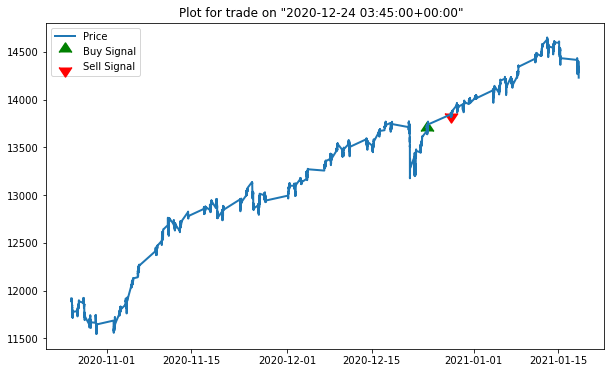

In [280]:
plt.figure(figsize=(10,6))
plt.plot(df_trade['time'], df_trade[' close'], label='Price',linewidth=2)
plt.scatter(test['buy_time'].iloc[0], test['buy_price'].iloc[0], label='Buy Signal', marker=matplotlib.markers.CARETUPBASE, color = 'green', s=160 )
plt.scatter(test['sell_time'].iloc[0], test['sell_price'].iloc[0], label='Sell Signal', marker=matplotlib.markers.CARETDOWNBASE, color = 'red', s=160 )
plt.title('Plot for trade on "2020-12-24 03:45:00+00:00"  ')
plt.legend(loc='best')
plt.show

above plot shows that on '2020-12-24 03:45:00+00:00' Buy condition was met shown in red and on'2020-12-28 03:48:00+00:00' target price was met so trade became inactive after that signaling red

#LETS TAKE 1st record where it signals us to buy at 2020-12-24 03:45:00+00:00 at price 13669.299805 and tells us to sell on 
2020-12-28 03:48:00+00:00
So, above strategy dataframe show that a

2.How many times it happened in the course of the given time period (26-October-2020 to 18-January-2021)

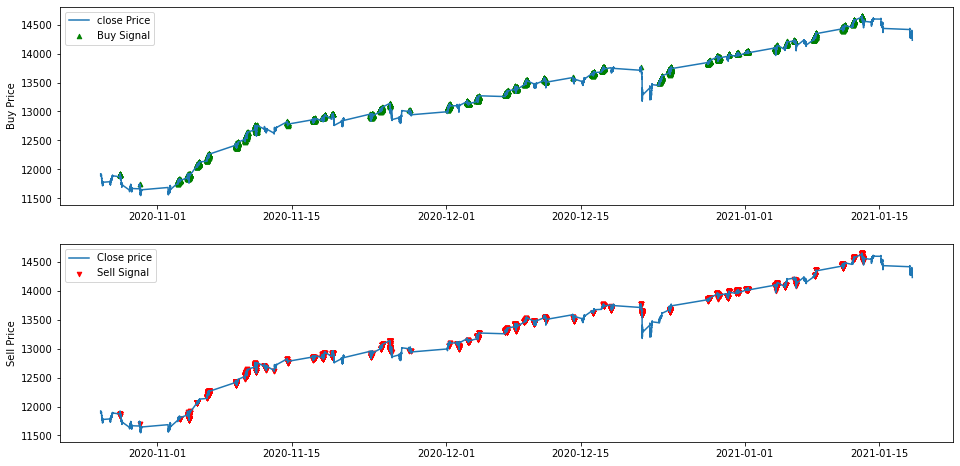

In [297]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))



ax1.plot(df_trade['time'], df_trade[' close'], label='close Price')
ax1.scatter(strategy['buy_time'], strategy['buy_price'], label='Buy Signal',marker='^', color = 'green',s=20 )
ax1.set_ylabel('Buy Price')
#ax1.title('Plot showing instances where strategy condition( when buy signal was given and trade status was active) are met as green')
ax1.legend(loc='best')

ax2.plot(df_trade['time'], df_trade[' close'], label='Close price')
ax2.scatter(strategy['sell_time'], strategy['sell_price'], label='Sell Signal', marker='v', color = 'red', s=20 )
ax2.set_ylabel('Sell Price')
ax2.legend(loc='best')

Plot showing instances where strategy condition(plot.1; when buy signal was given and trade status was active) are met as green') and (plot.2; when signal signal was given and trade status was inactive) are met as green')

In [235]:
count_sl = 0
count_tp = 0
count = 0
for i in range(len(df_trade)):
    if(df_trade[' Signal'].iloc[i] == ' Buy'):
        count = count + 1
        if(df_trade[' Trade_type'].iloc[i] == ' TP'):
            count_tp = count_tp + 1
        if(df_trade[' Trade_type'].iloc[i] == ' SL'):
            count_sl = count_sl + 1

In [236]:
count

10221

In [237]:
count_tp

4021

In [238]:
count_sl

6200

We see that the strategy takes place at various instance in the course of the given time period of (26-October-2020 to 18-January-2021) around 10221. And we noticed that the around 4021 time if buy condition is satisfied then target profit is met. Around 6200 time stoploss is met.

3.If the strategy 1 occurred how much profit trader made assuming number of stocks bought were 10 when the trade was "Active".


To solve above question we make an assumption that all the open, high, low, close data of nse as real price of the stock. Once the fisrt condition is met, current close price crosses previous day's high stock is bought. Lets take the above situation where we showed plot and extract trade status of "2020-12-24", the strategy recommends the trade to buy stock at the time  "03:45:00+00:00" and advice to sell the stock on '2020-12-28 03:48:00+00:00'. So buying price is Rs.13669.299805 and trade is executed at the sell price Rs.13858.30. Assuming that the number of stocks bought were 10 when trade status was given active.
Now we see that target price is Rs.13856.54981 and stoploss Rs.13622.48731. We see that graph shows increasing trend around 2020-12-24 and selling price is Rs.13858.30 which is greater than target price Rs.13856.54981. Therefore trade was excecuted on 
'2020-12-28 03:48:00'. Although we notice in the graph that the close value is increasing and we could have excuted the trade manually at high price by waiting, since we have set the target price the compiler we execute the trade once target is met. 
So profit booked is (Selling price - Buying price)*Quantity of stocks bought which is (Rs.13858.30-Rs.13669.299805)*10

In [284]:
#lets code profit
profit = 10*(test['sell_price'].iloc[0] - test['buy_price'].iloc[0])
print("Profit made by trader when trade was Active is Rs.{}".format(profit))

Profit made by trader when trade was Active is Rs.1890.0019499999871
